# Problem Set 1 
## Forecasting/Predictive Analysis 
### Hyndman Book Chapter 2.10


--------------------------------

#### **Name: Sherry PENG Tian** 

#### **Date: Sept. 17, 2019** 

In [1]:
rm(list = ls()) # Clear environment
gc()            # Clear unused memory
##          used (Mb) gc trigger (Mb) limit (Mb) max used (Mb)
## Ncells 460358 24.6    1000012 53.5         NA   630591 33.7
## Vcells 897455  6.9    8388608 64.0      16384  1767236 13.5
cat("\f")       # Clear the console

# Set up and load packages 
library(ggplot2)
library(fpp2)

used    (Mb) gc trigger (Mb) limit (Mb) max used (Mb)
Ncells  522482 28.0 1177322    62.9    NA       630965  33.7
Vcells 1029297  7.9 8388608    64.0 16384      1768527  13.5

Loading required package: forecast
Warning message:
“package ‘forecast’ was built under R version 3.5.2”Loading required package: fma
Loading required package: expsmooth


In [2]:
library(cowplot)

Warning message:
“package ‘cowplot’ was built under R version 3.5.2”
Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [3]:
summary(cars)

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

### 2.10.1 

In [4]:
?gold
?woolyrnq
?gas

- Gold: Daily morning gold prices in US dollars. 1 January 1985 – 31 March 1989. 

- Wood: Quarterly production of woollen yarn in Australia: tonnes. Mar 1965 – Sep 1994. 

- Gas: Australian monthly gas production: 1956–1995.

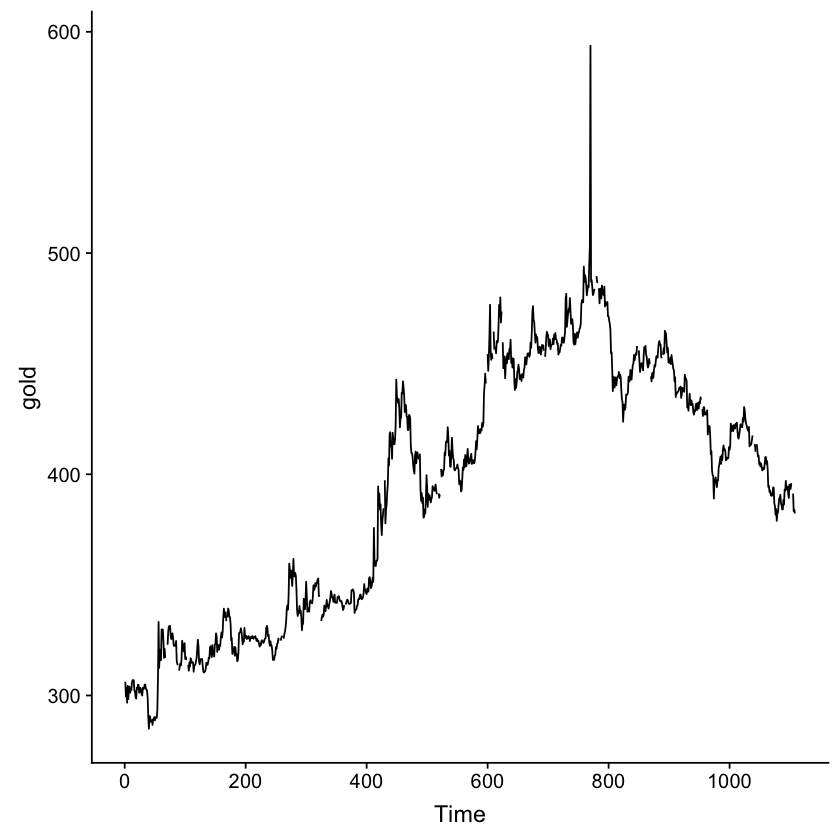

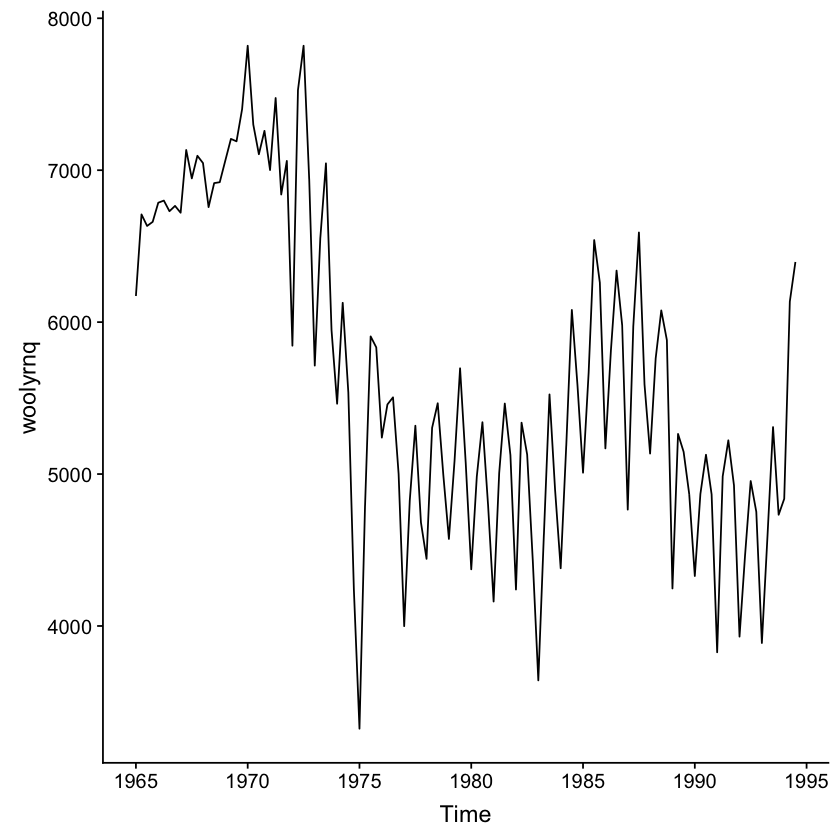

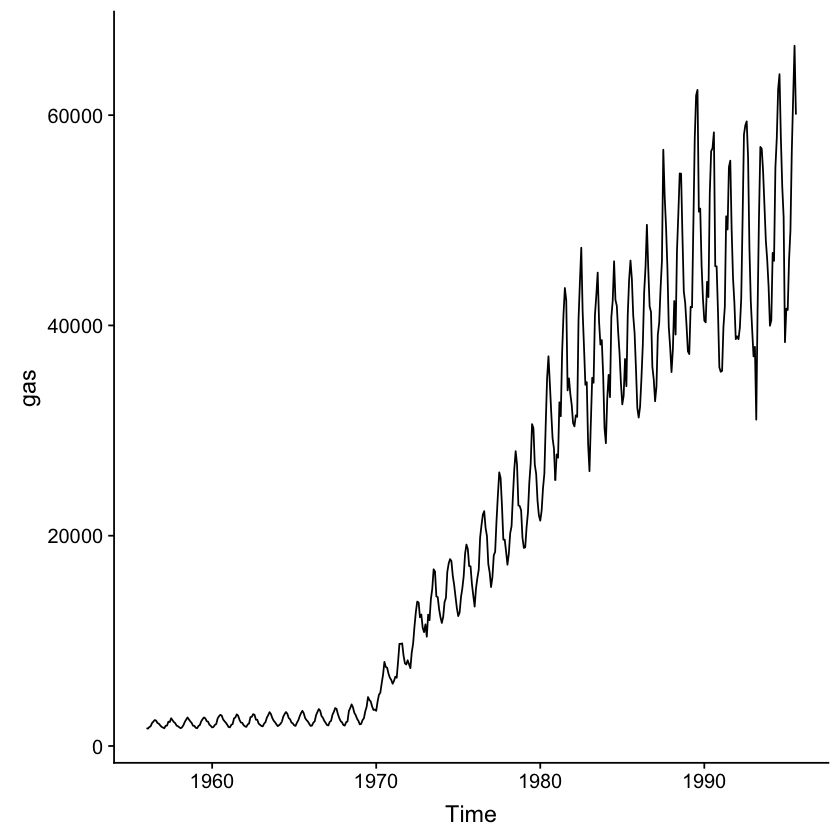

In [5]:
# a. 
autoplot(gold)
autoplot(woolyrnq)
autoplot(gas)

In [6]:
# b. 
frequency(gold)
frequency(woolyrnq)
frequency(gas)

[1] 1

[1] 4

[1] 12

In [7]:
# c. 
which.max(gold)   # 770 is the highest outlier in the plot. 
which.max(woolyrnq)
which.max(gas)

[1] 770

[1] 21

[1] 475

### 2.10.2

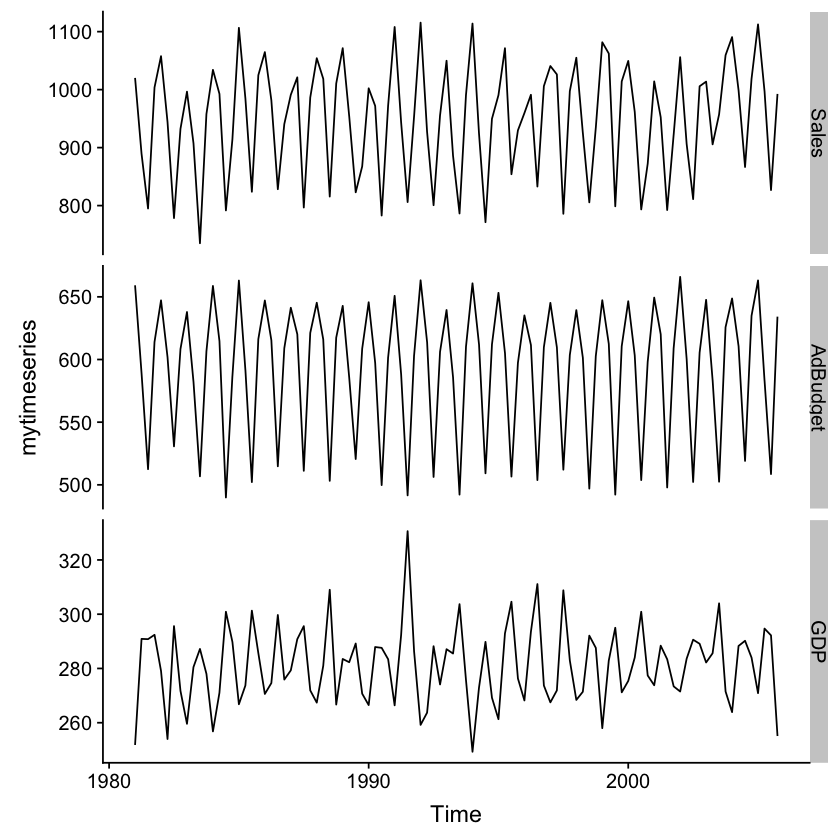

In [8]:
# a. 
tute1 <- read.csv("Data/tute1.csv", header = TRUE)
# b. 
mytimeseries <- ts(tute1[,-1], start = 1981, frequency = 4)
# The [,-1] removes the first column which contains the quarters. 
# c. 
autoplot(mytimeseries, facets = TRUE)

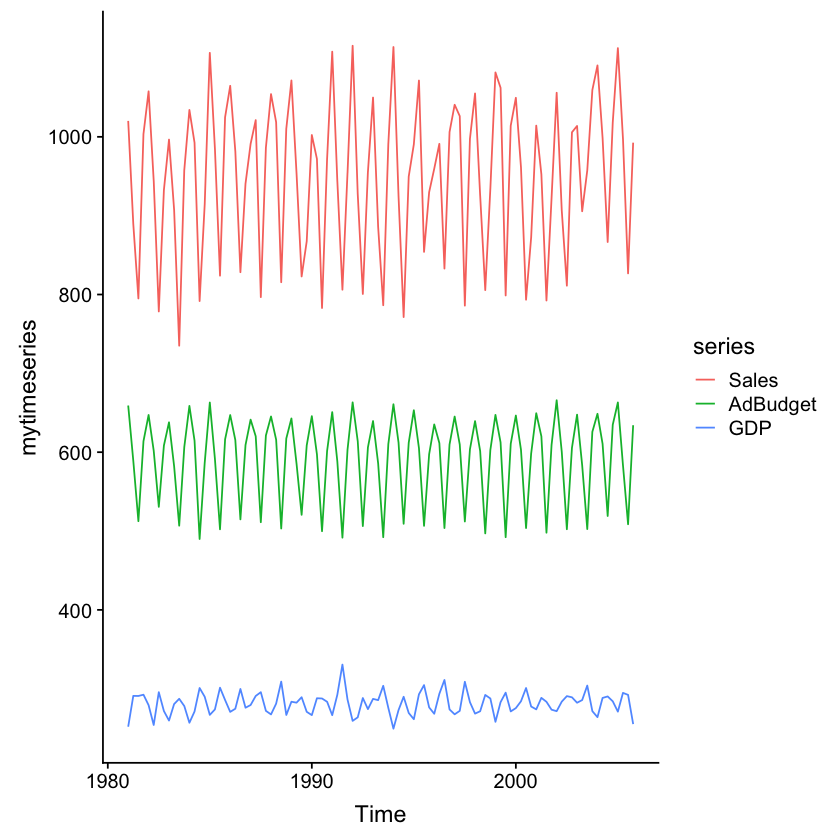

In [9]:
# Alternatively, 
autoplot(mytimeseries)

When not including facets = TRUE in the autoplot(), multiple time series will be faceted (and unless specified, colour is set to FALSE). If FALSE, each series will be assigned a colour, which means each column is plotted seperated in a different color when using autoplot(), and the scale will not be changed into the same “dimension”.


### 2.10.3

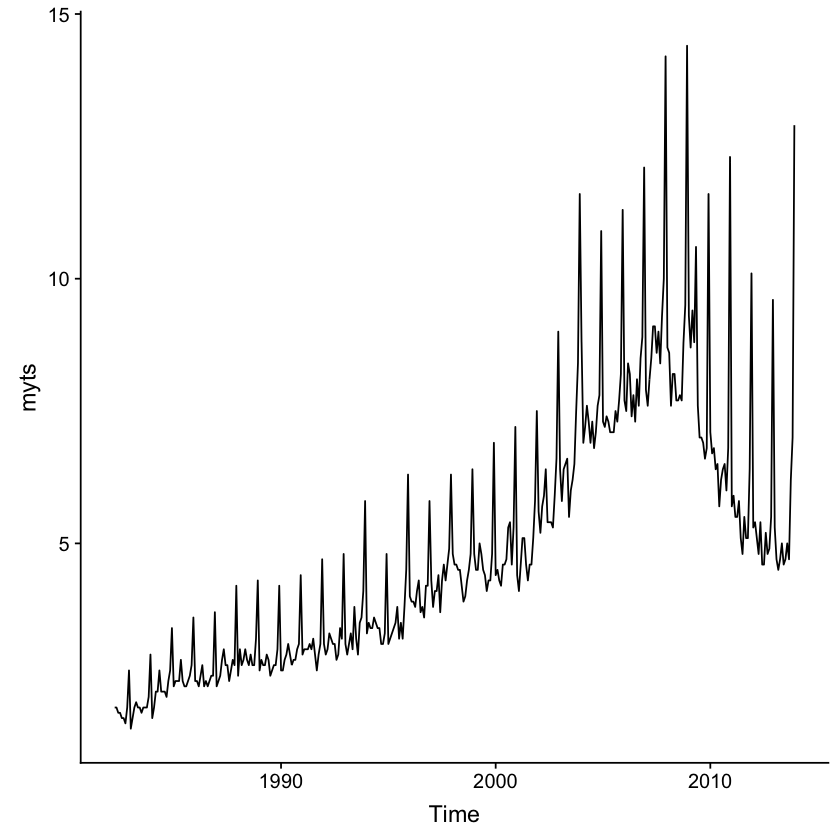

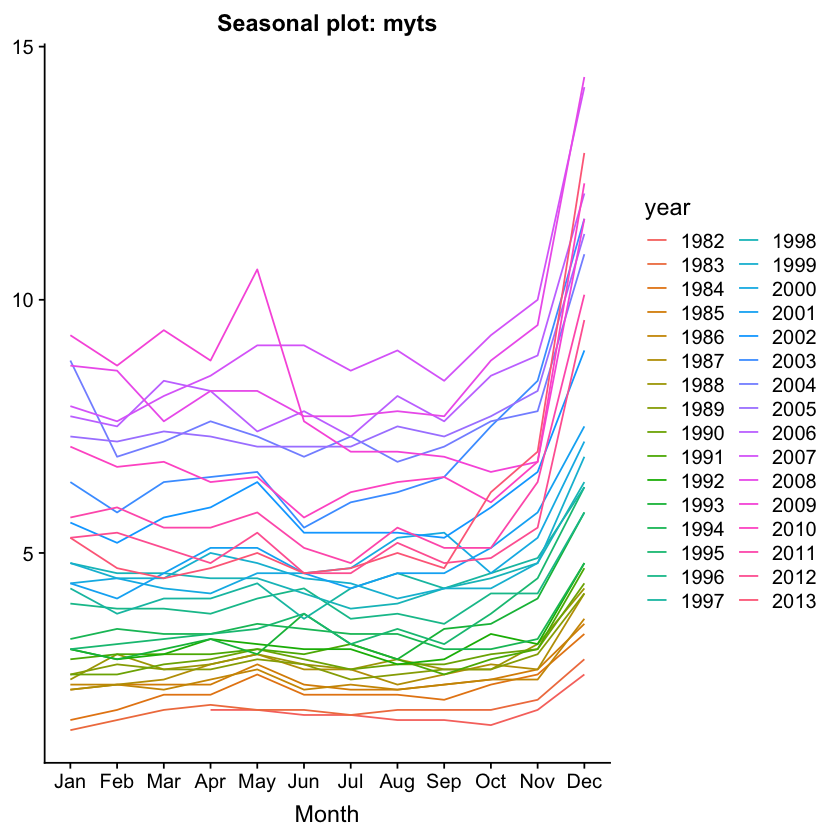

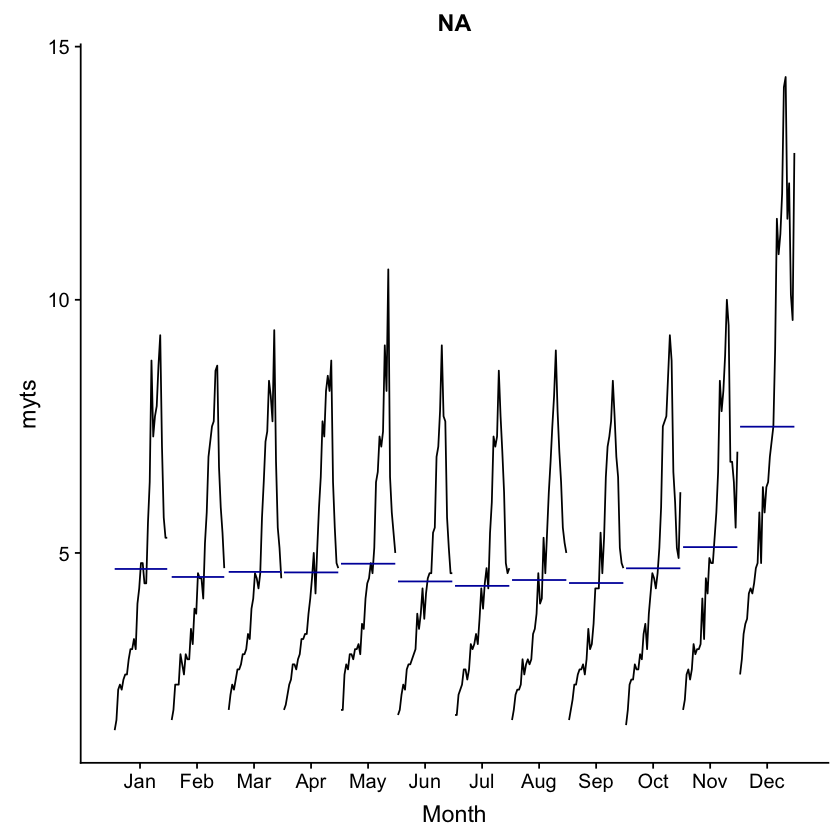

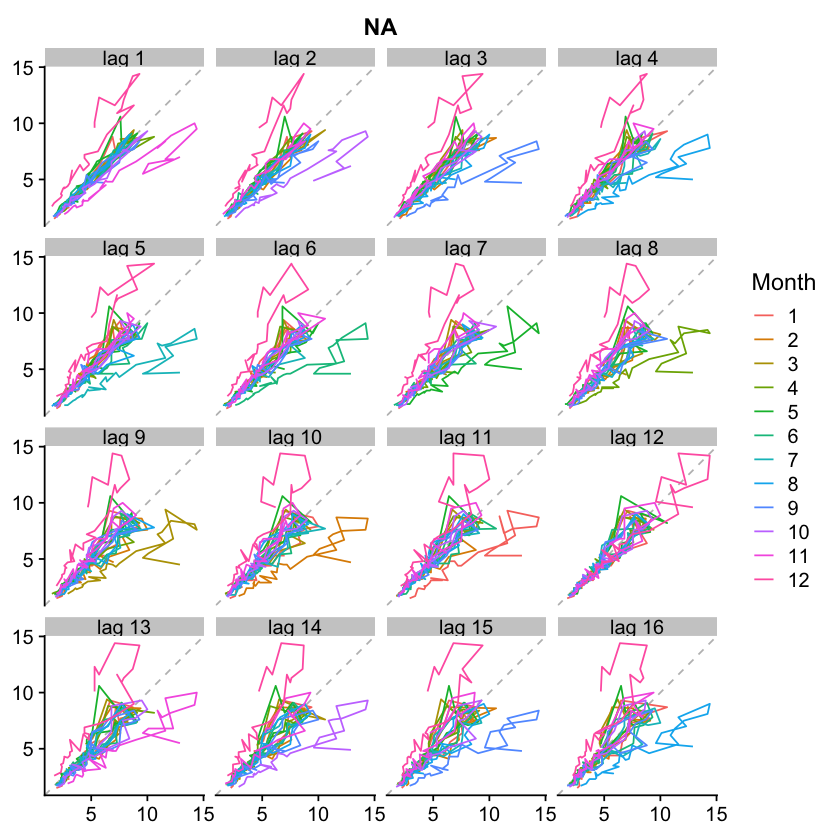

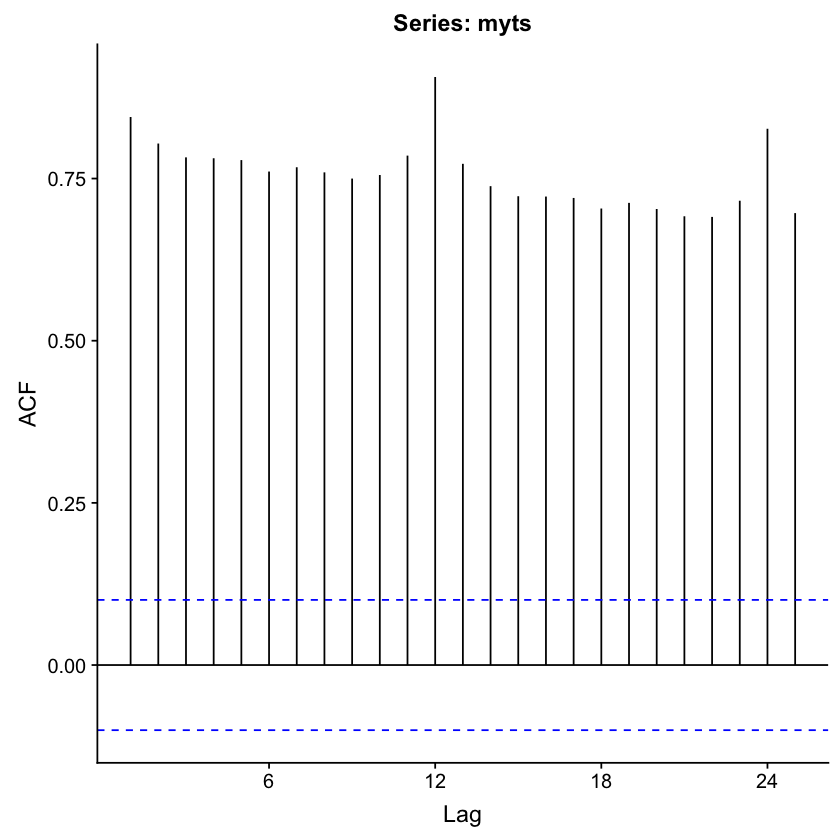

In [10]:
# a. 
retaildata <- readxl::read_excel("Data/retail.xlsx", skip = 1)
# skip=1 is required because the Excel sheet has two header rows 
samplets <- ts(retaildata[, "A3349873A"], 
               frequency = 12, start = c(1982, 4))
# b. 
myts <- ts(retaildata[, "A3349588R"], 
           frequency = 12, start = c(1982, 4))
# c. 
autoplot(myts)
ggseasonplot(myts)
ggsubseriesplot(myts)   # might be the best
gglagplot(myts)
ggAcf(myts)

Q: Can you spot any seasonality, cyclicity and trend? What do you learn about the series? 

A: The trend is growing overall but keeps dropping around 2009. There is a strong seasonality every year that December has the highest growth and max “sales(might be)”, while other months roughly stay the same. The cyclicity appears after 2010, which indicates the business cycle might enter the recession phase.

### 2.10.4

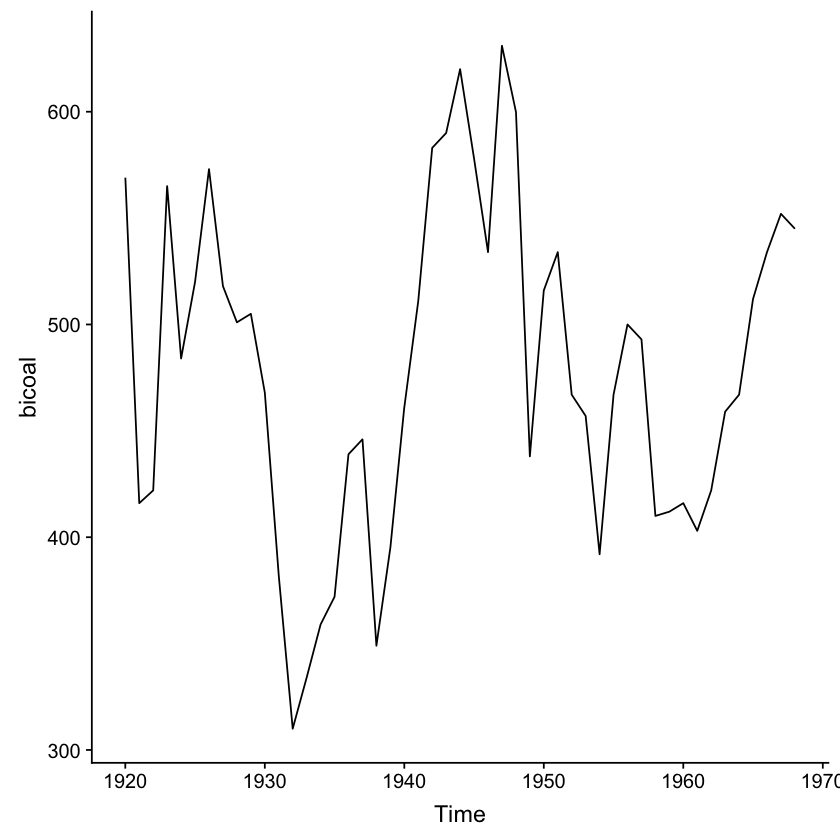

In [11]:
help(bicoal)
# Annual bituminous coal production in the USA: 1920–1968.
autoplot(bicoal)

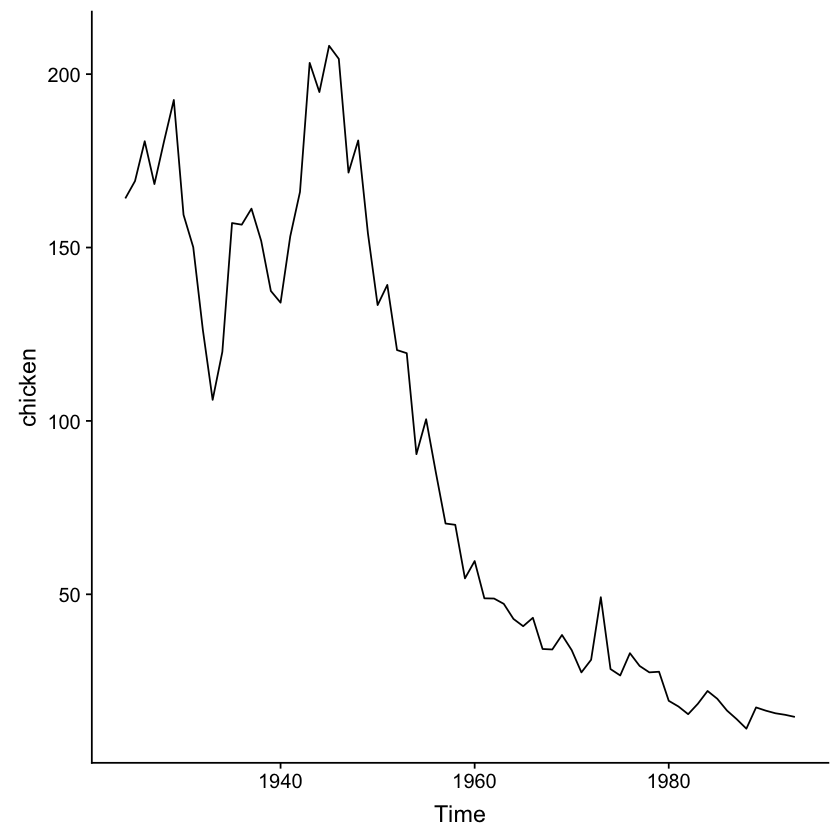

In [12]:
help(chicken)
# Price of chicken in US (constant dollars): 1924–1993.
autoplot(chicken)

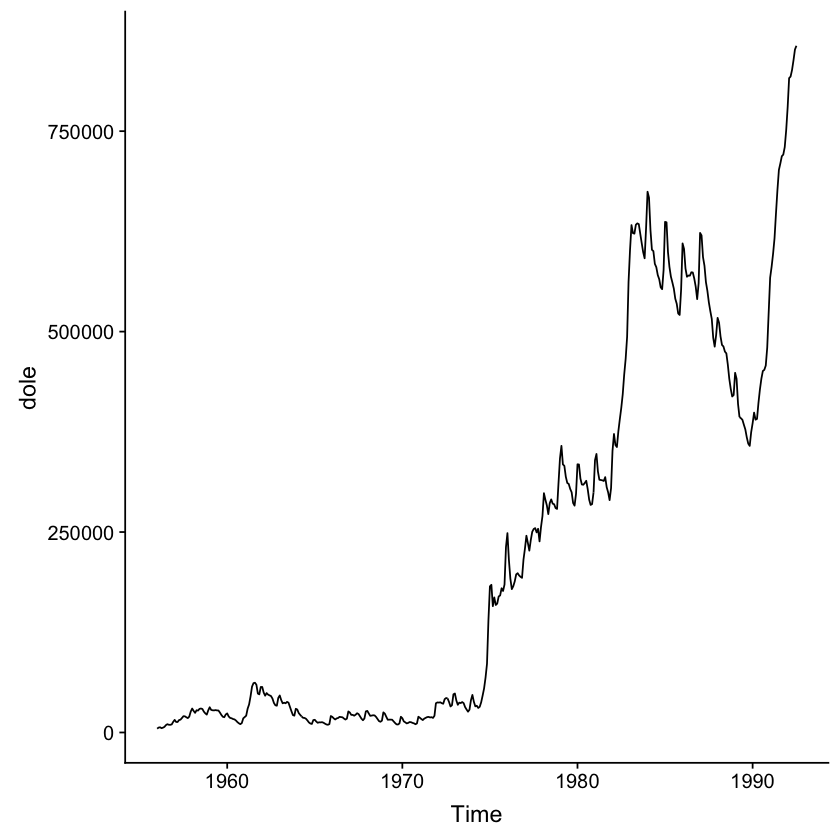

In [13]:
help(dole)
# Monthly total of people on unemployment benefits in Australia (Jan 1965 – Jul 1992).
autoplot(dole)

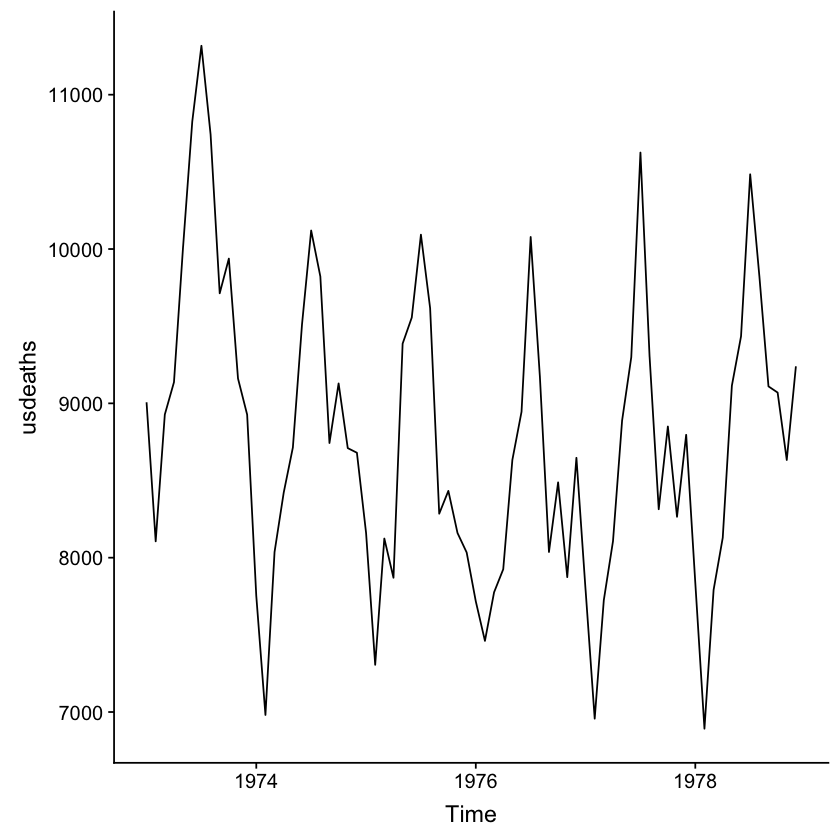

In [14]:
help(usdeaths)
# Monthly accidental deaths in USA.
autoplot(usdeaths)

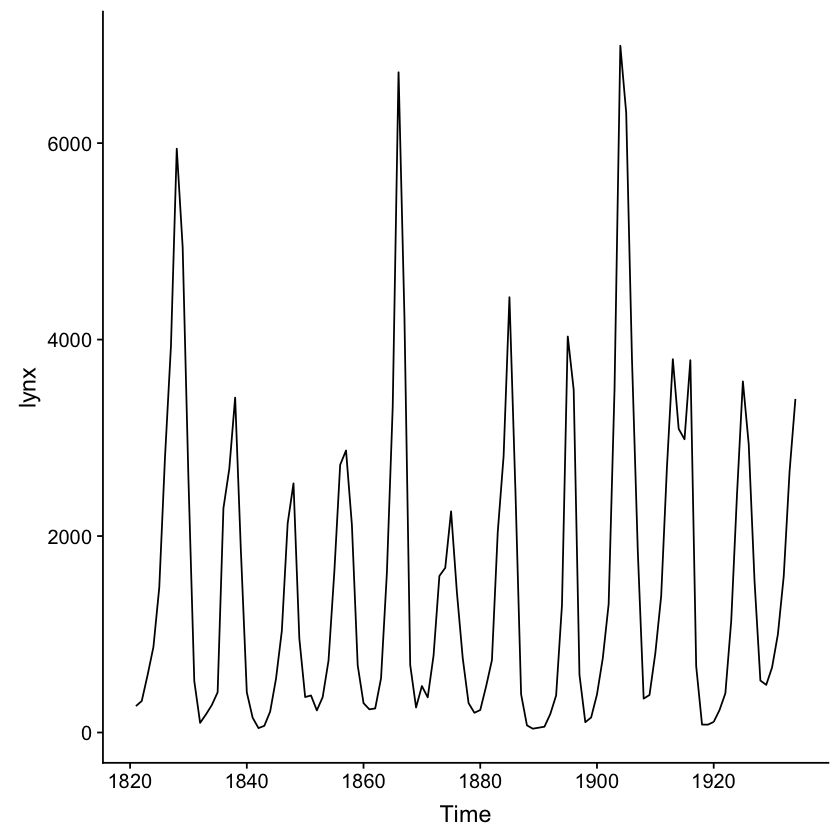

In [15]:
help(lynx)
## Help on topic 'lynx' was found in the following packages:
## 
##   Package               Library
##   fma                   /Library/Frameworks/R.framework/Versions/3.5/Resources/library
##   datasets              /Library/Frameworks/R.framework/Versions/3.5/Resources/library
## 
## 
## Using the first match ...
# Annual Canadian Lynx trappings 1821-1934. 
autoplot(lynx)

Seasonality of around 40 years in a big run and every 5 years of the smaller seasonality.

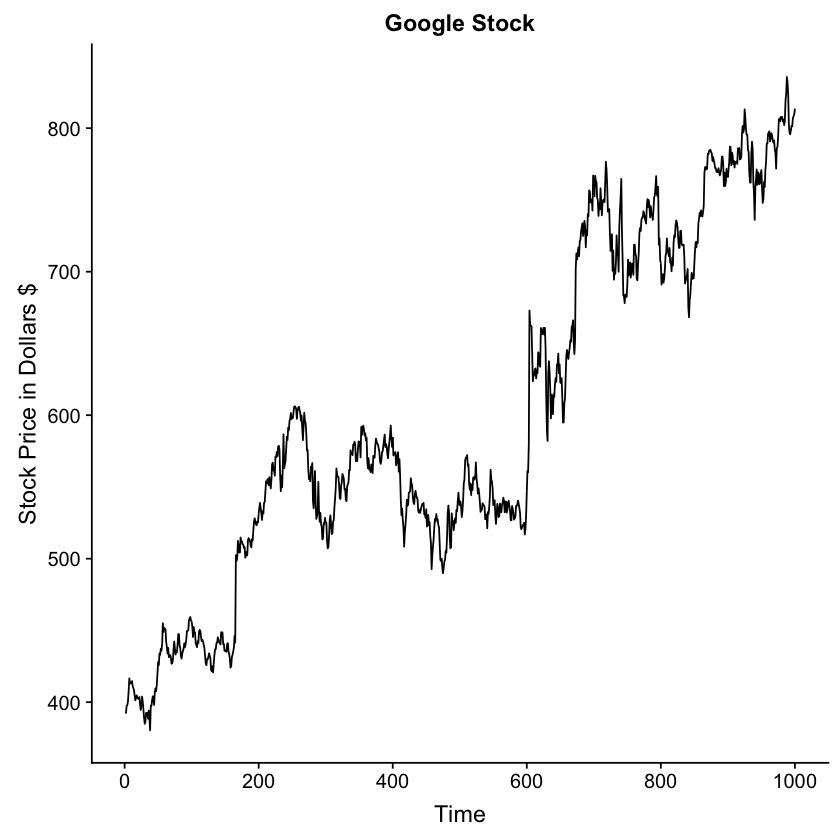

In [16]:
help("goog")
# Closing stock prices of GOOG from the NASDAQ exchange, for 1000 consecutive trading days between 25 February 2013 and 13 February 2017. Adjusted for splits. goog200 contains the first 200 observations from goog.
autoplot(goog) + ylab("Stock Price in Dollars $") + ggtitle("Google Stock")

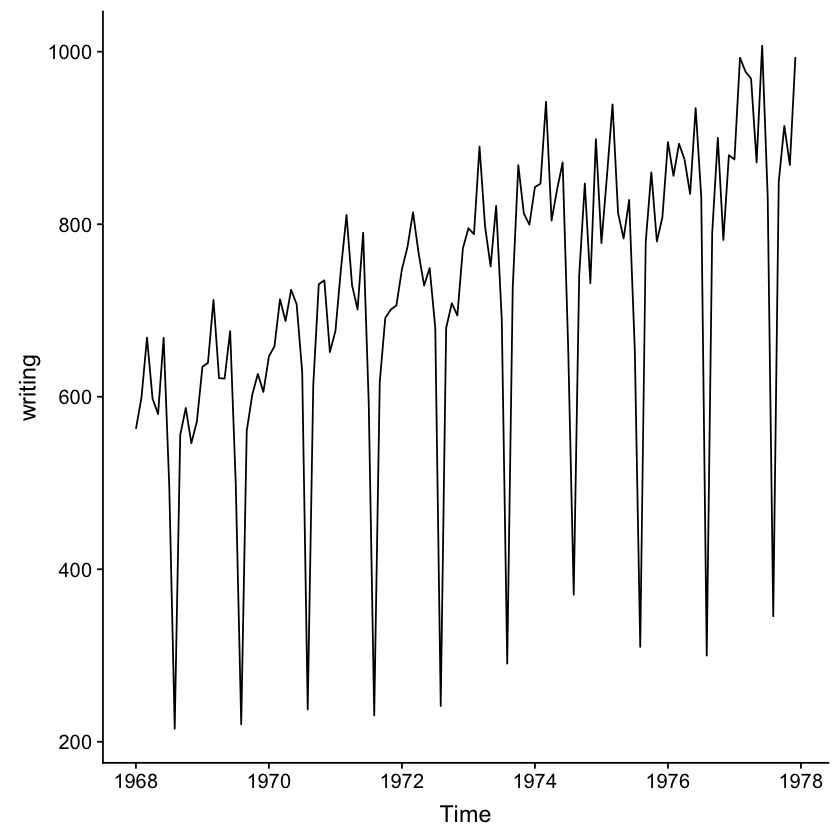

In [17]:
help(writing)
# Industry sales for printing and writing paper (in thousands of French francs): Jan 1963 – Dec 1972.
autoplot(writing)

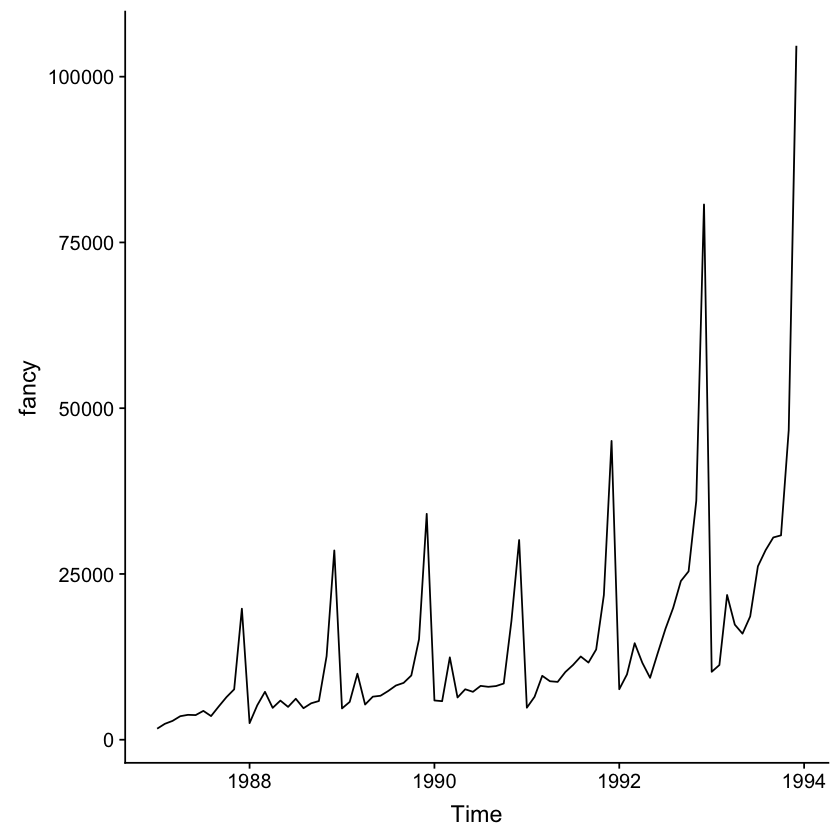

In [18]:
help(fancy)
# Monthly sales for a souvenir shop on the wharf at a beach resort town in Queensland, Australia.
autoplot(fancy)

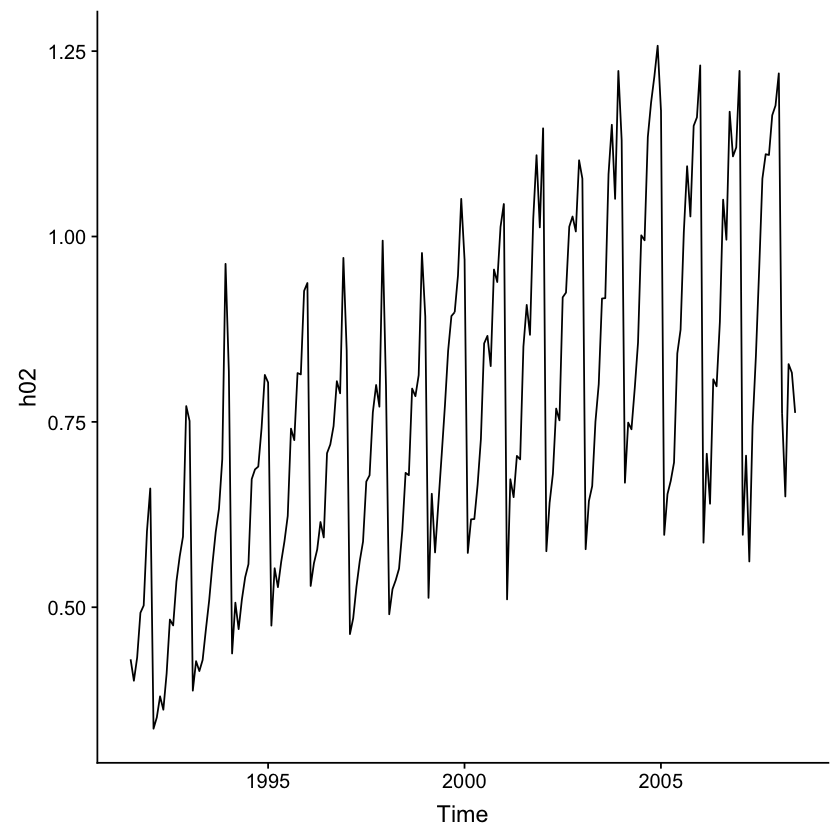

In [19]:
help(a10)
# Monthly anti-diabetic drug sales in Australia from 1991 to 2008.
# Total monthly scripts for pharmaceutical products falling under ATC code A10, as recorded by the Australian Health Insurance Commission. July 1991 - June 2008.

autoplot(h02)

### 2.10.5

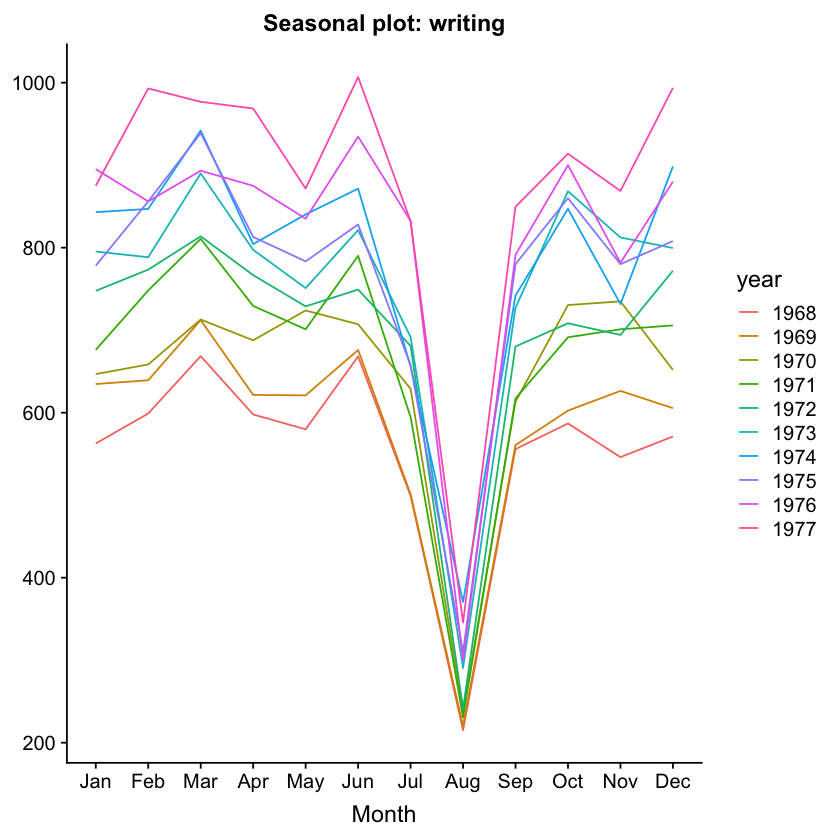

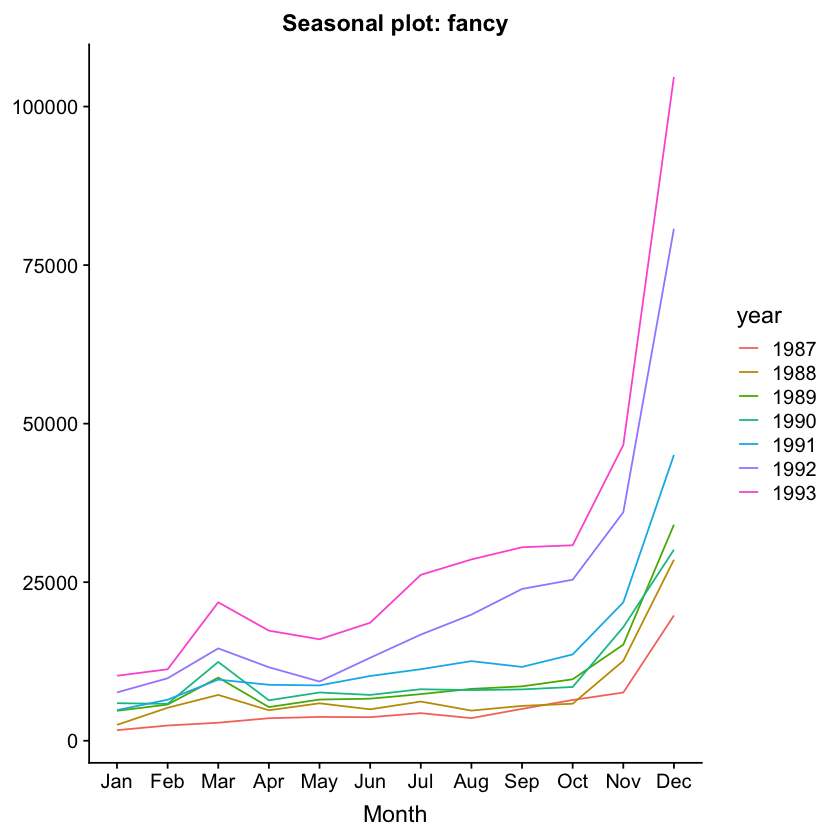

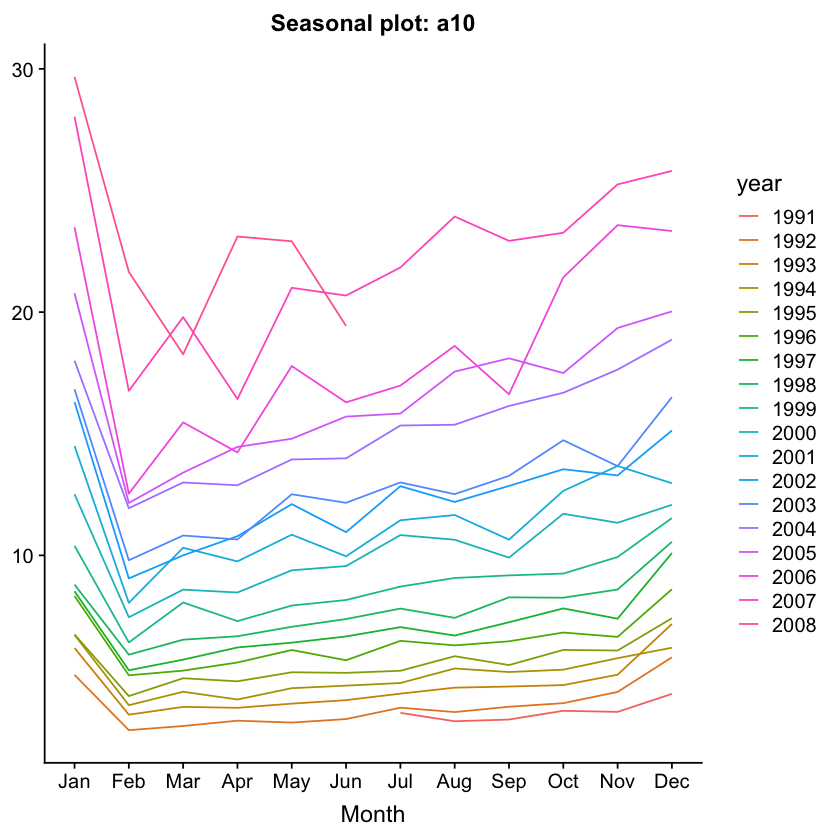

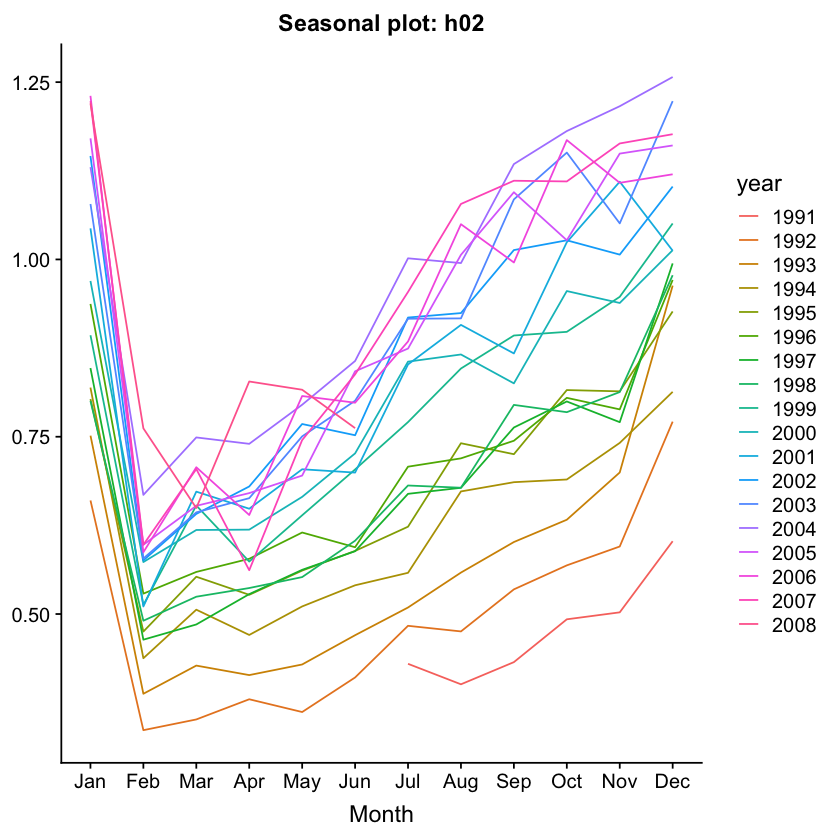

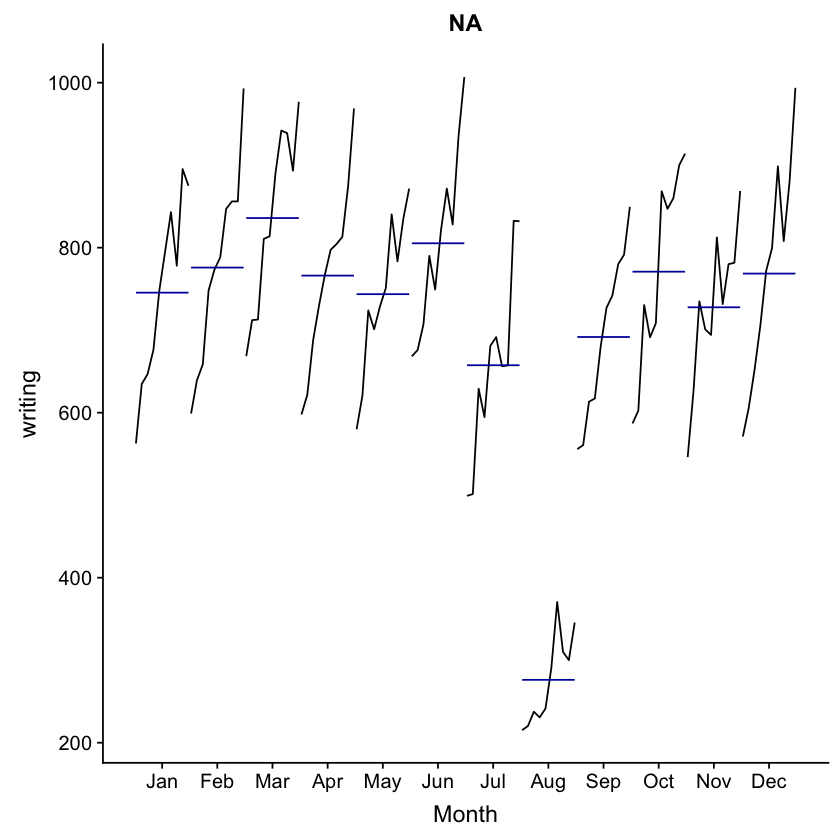

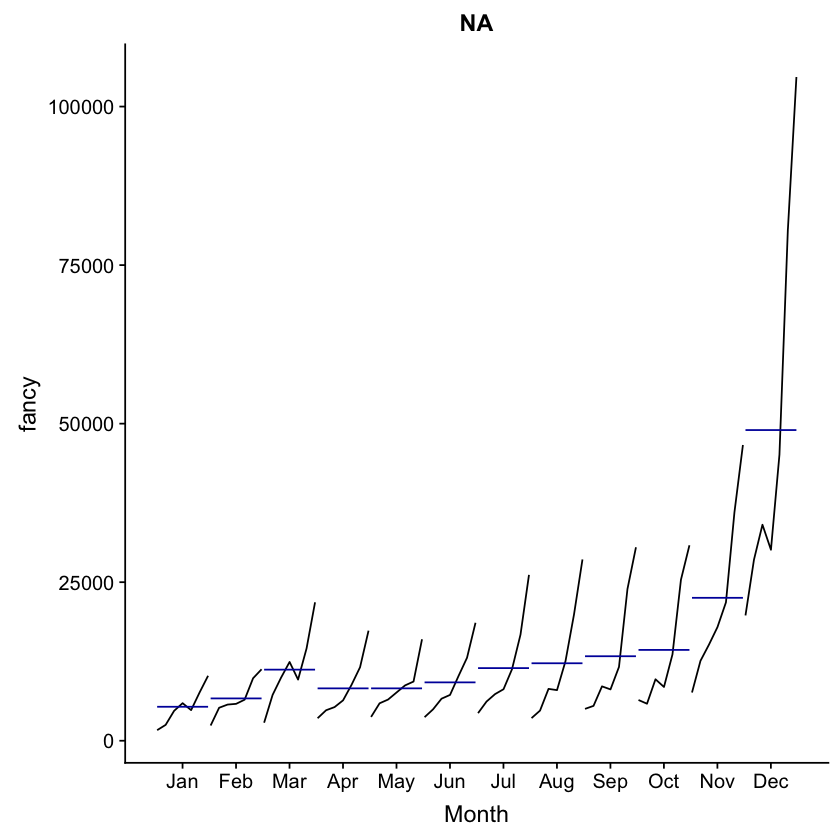

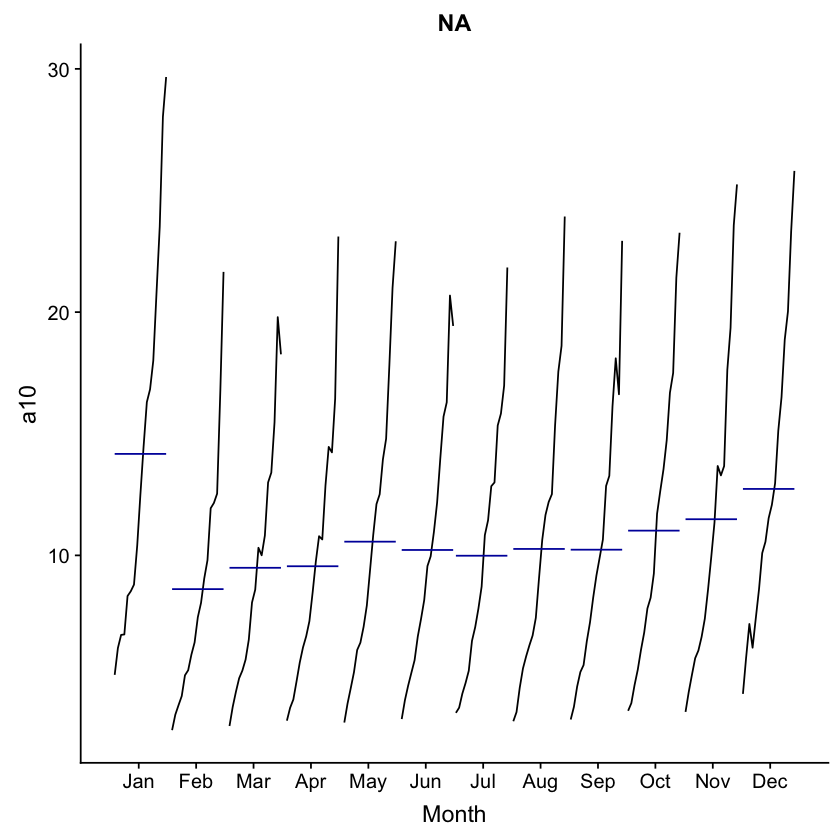

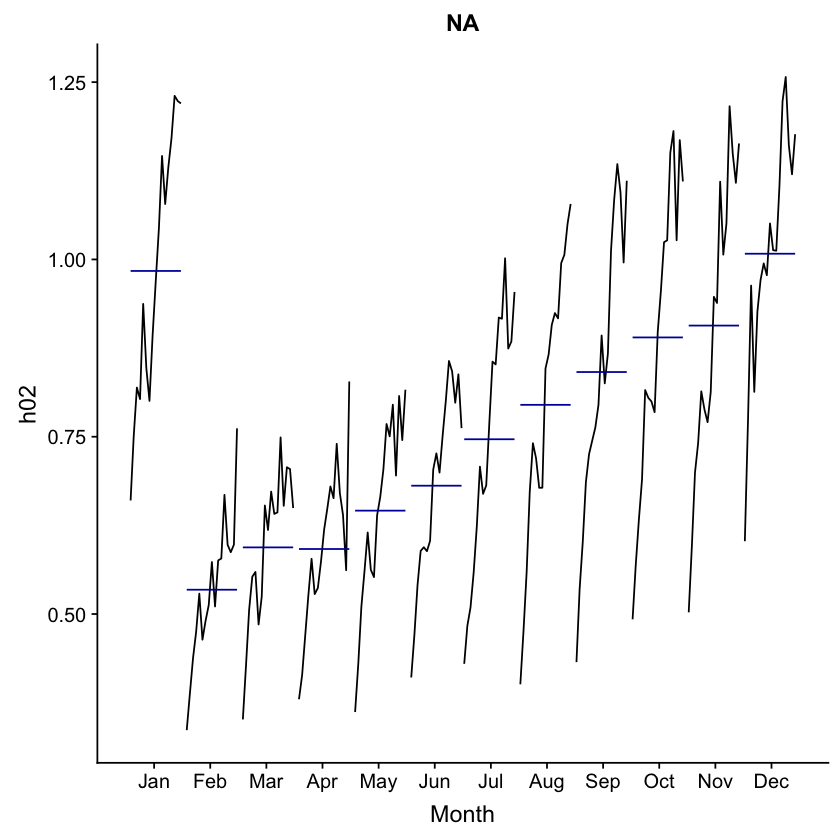

In [20]:
ggseasonplot(writing)


ggseasonplot(fancy)


ggseasonplot(a10)


ggseasonplot(h02)


ggsubseriesplot(writing)


ggsubseriesplot(fancy)


ggsubseriesplot(a10)


ggsubseriesplot(h02)

Q: What can you say about the seasonal patterns? Can you identify any unusual years? 

A: `writing`: There is a strong seasonality occuring in August with a huge drop every year, and also it stays roughly grwoing from Jan. to Mar and then drops to Apr. growing to Jun; and then roughly the same after Sept. There isn’t an obviously unusally year. 

`fancy`: There is a relatively strong seasanality occuring from November to December every end of the year of growth. But I fail to notice any unusual year other than 1993 that there is also a peak in March and the growth in December is enemorous. 

`a10`: There is a strong seasonality that every year it starts high in Jan. and then drop in Feb. and then grow slowly in the rest of the years. However, 2008 appears to be the unusual year that there is no clear pattern and the dataset stops in the middle. 

`h02`: There is a strong seasonality that every year the growth starts around Feburary and then grow at a relatively satisfying rate till the Jan. of the next year. The unusual years might be 1991 that the data starts after July and 2008 that the data ends around June.


### 2.10.6

> Question: Can you spot any seasonality, cyclicity and trend?

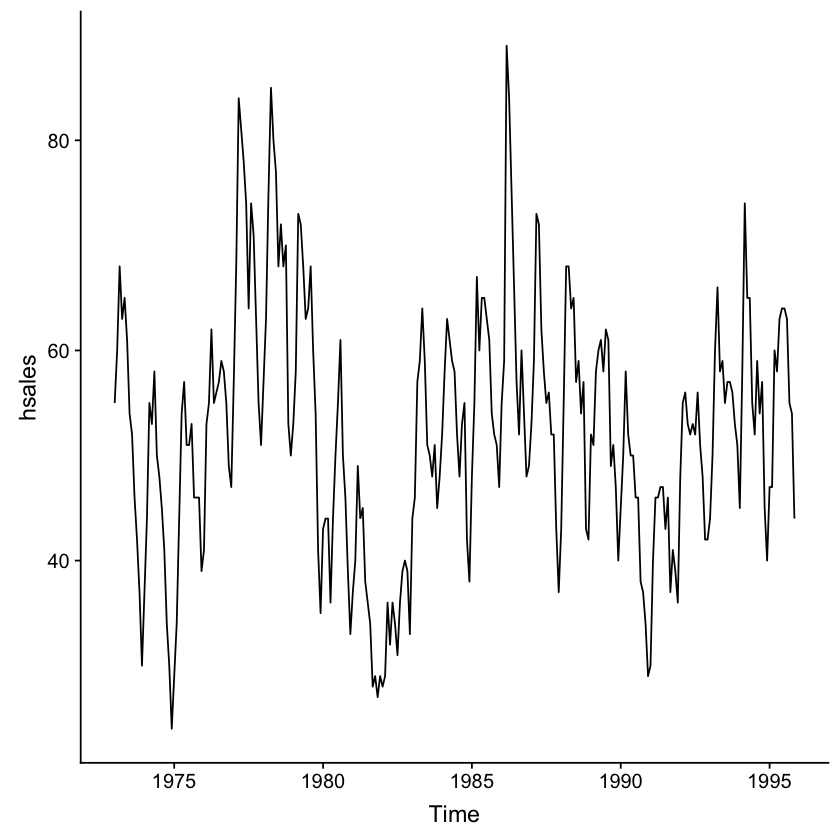

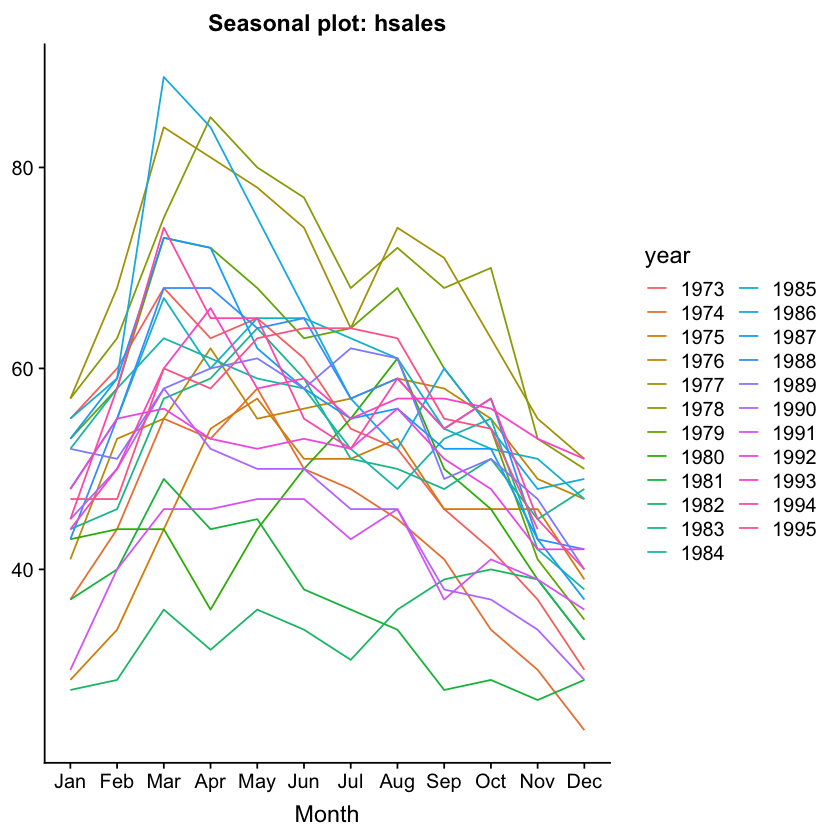

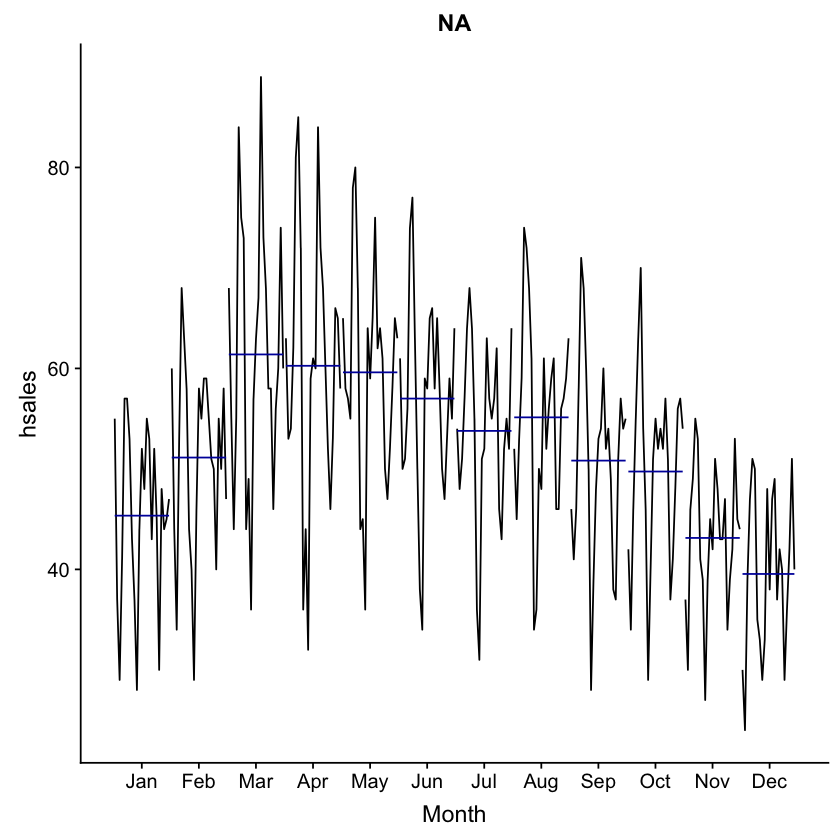

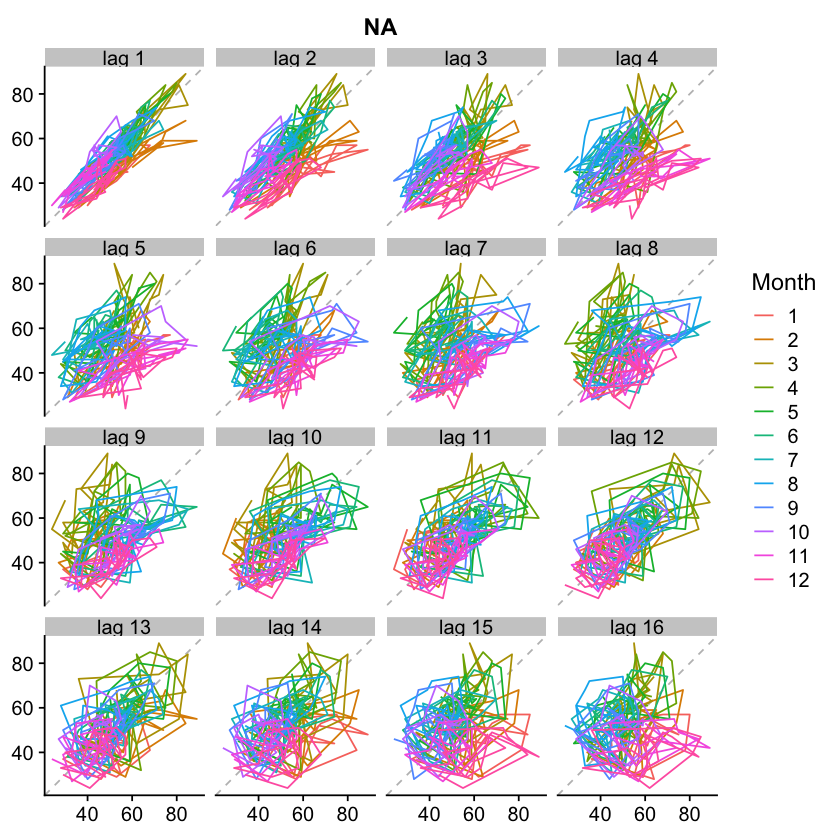

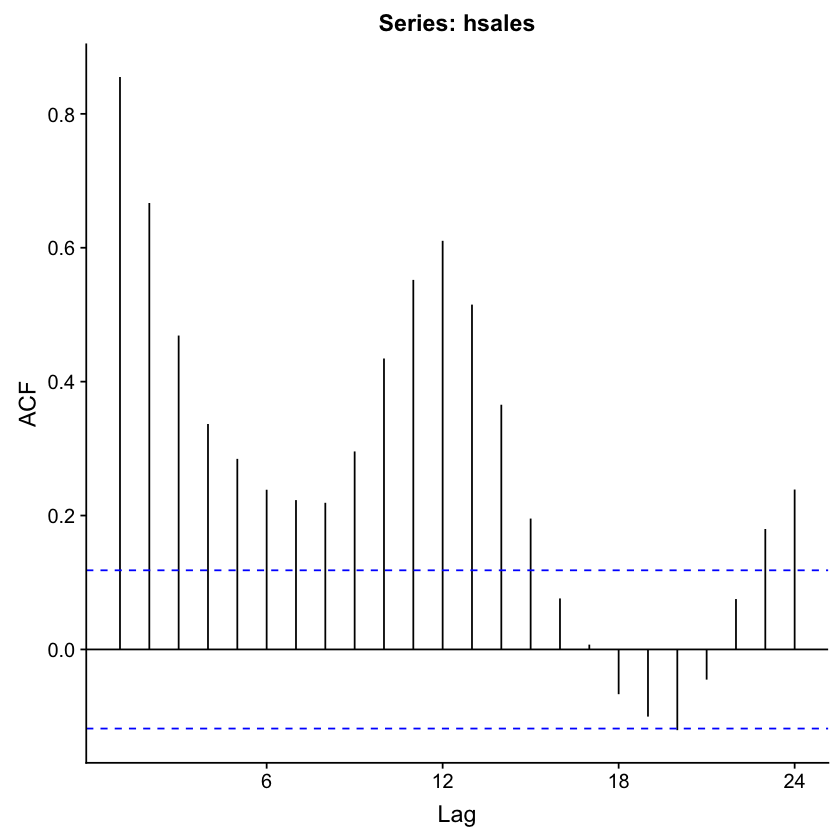

In [21]:
autoplot(hsales)
ggseasonplot(hsales)
ggsubseriesplot(hsales)
gglagplot(hsales)
ggAcf(hsales)

US Sales, cyclical where the trend shown not fit to a certain period every year. Some repetition of seasonality around. 

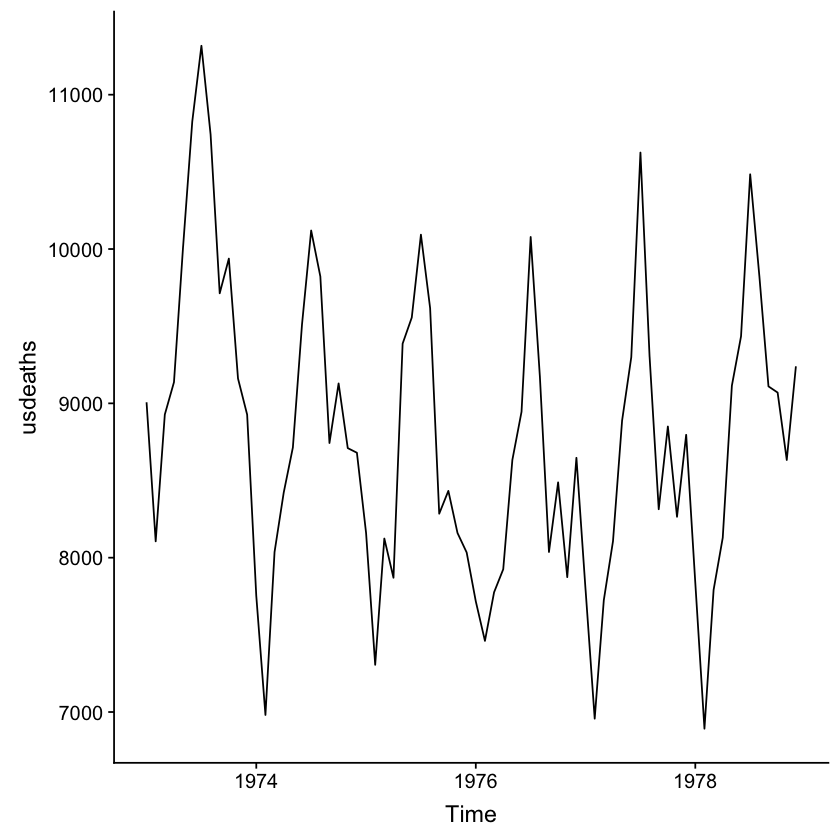

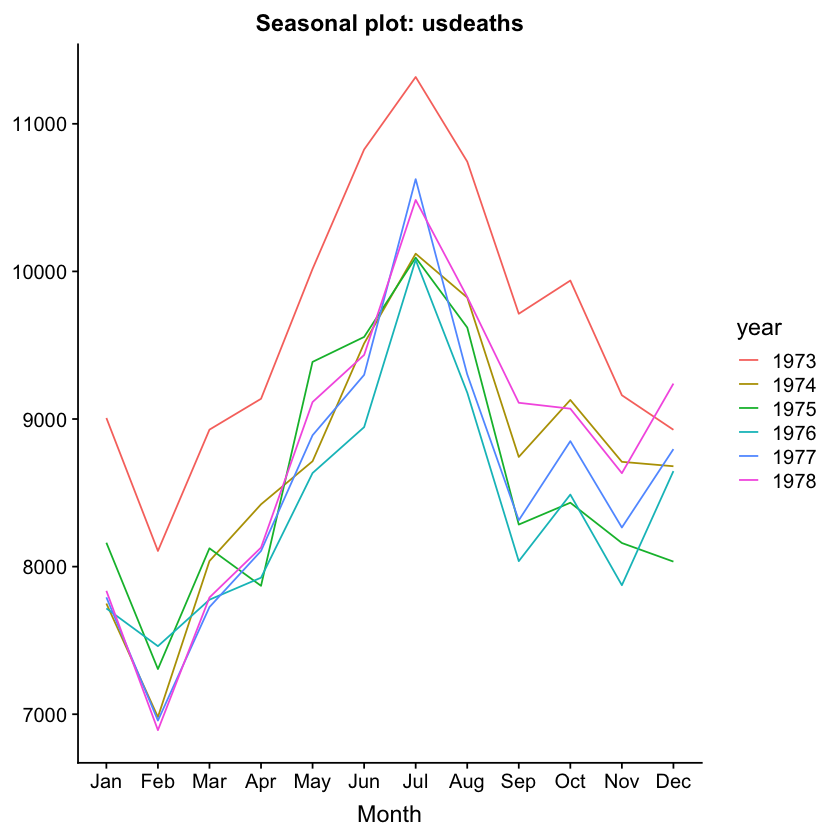

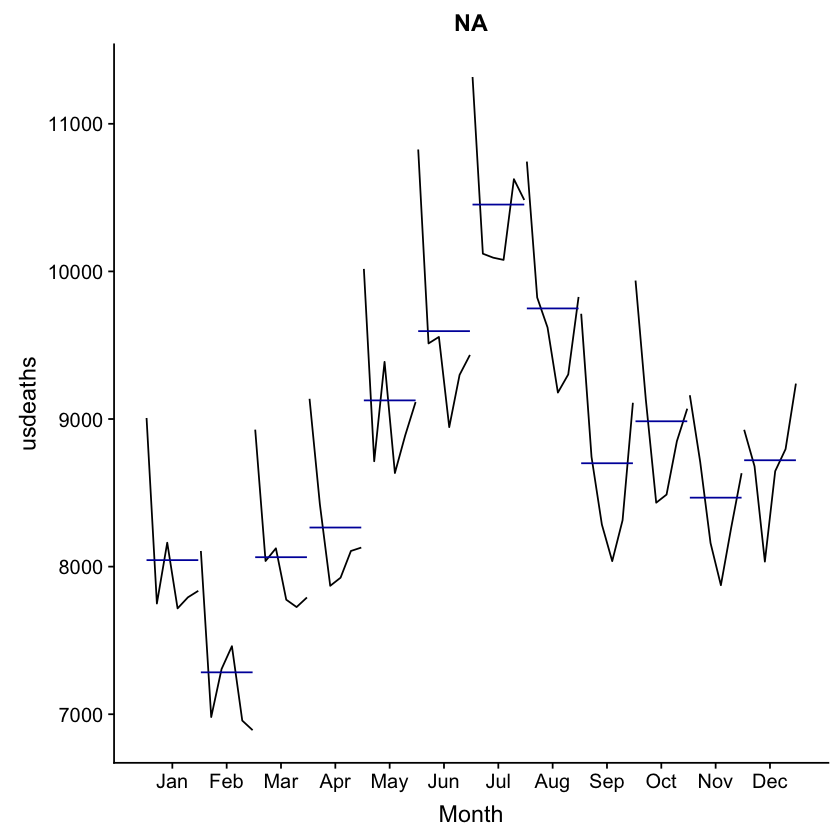

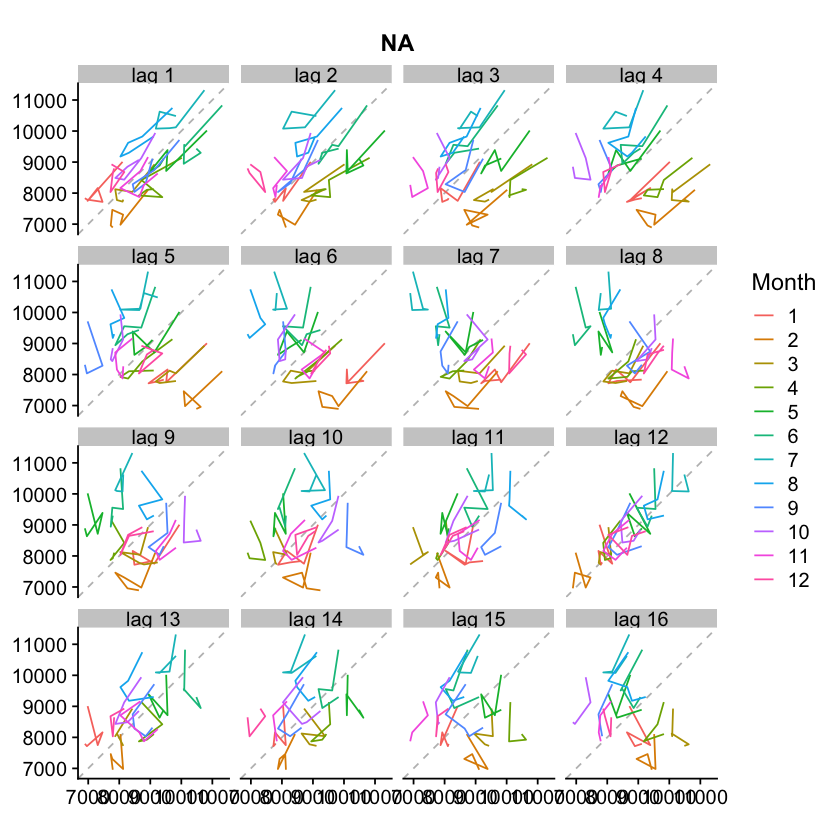

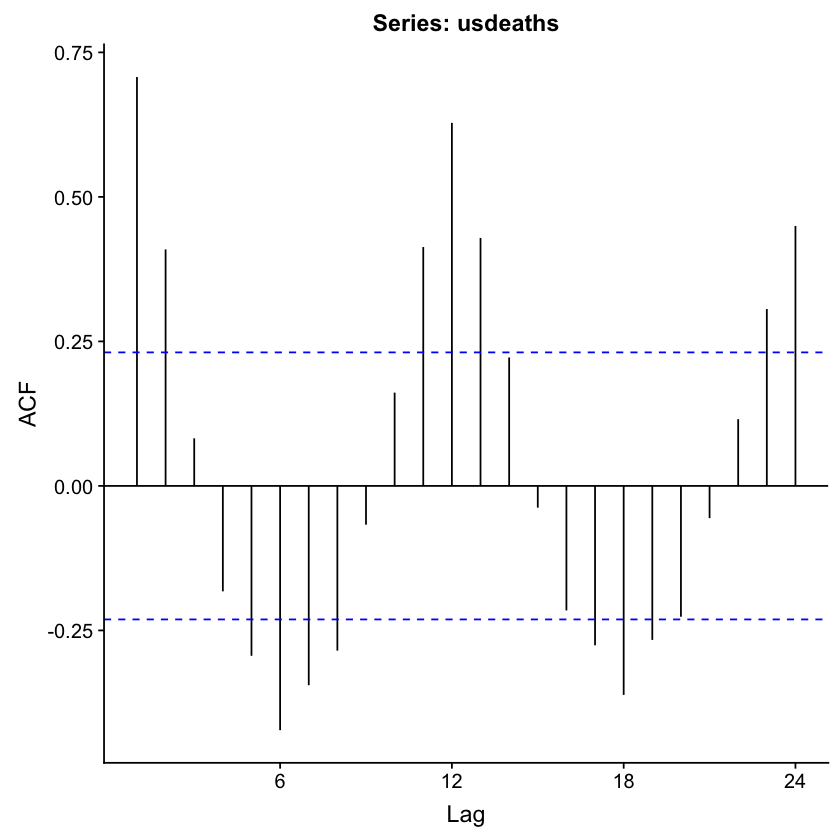

In [22]:
autoplot(usdeaths)
ggseasonplot(usdeaths)
ggsubseriesplot(usdeaths)
gglagplot(usdeaths)
ggAcf(usdeaths)

Seasonality with a peak in July. 

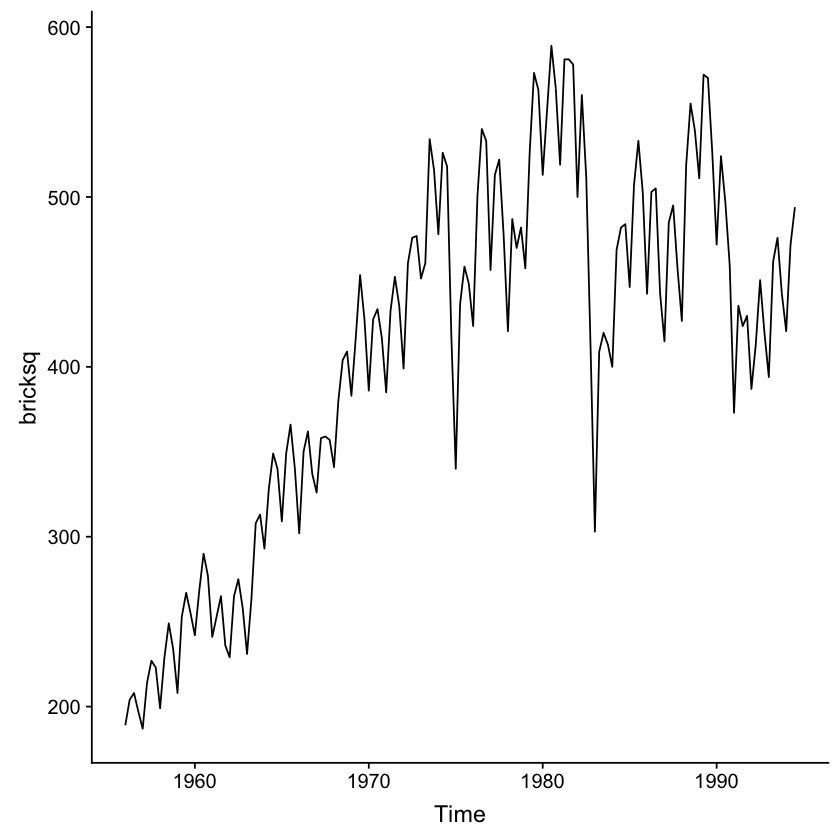

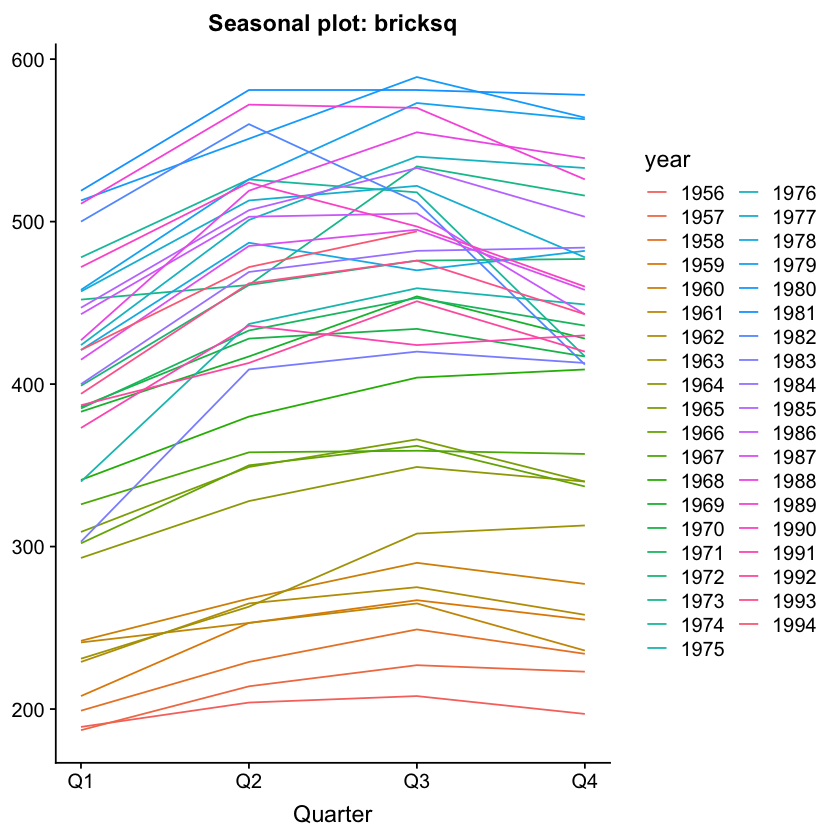

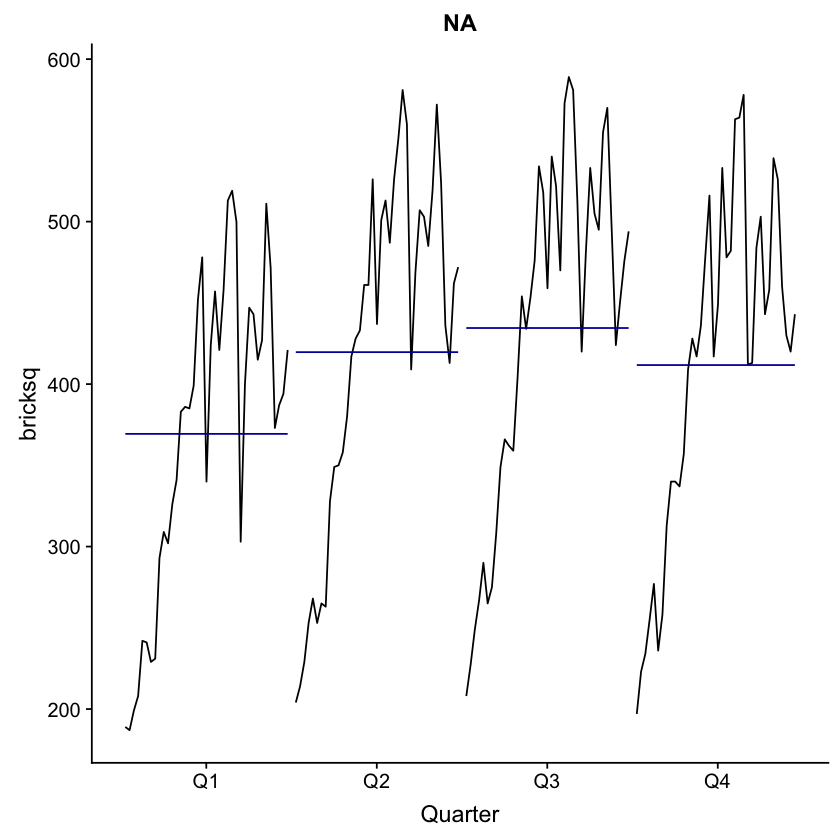

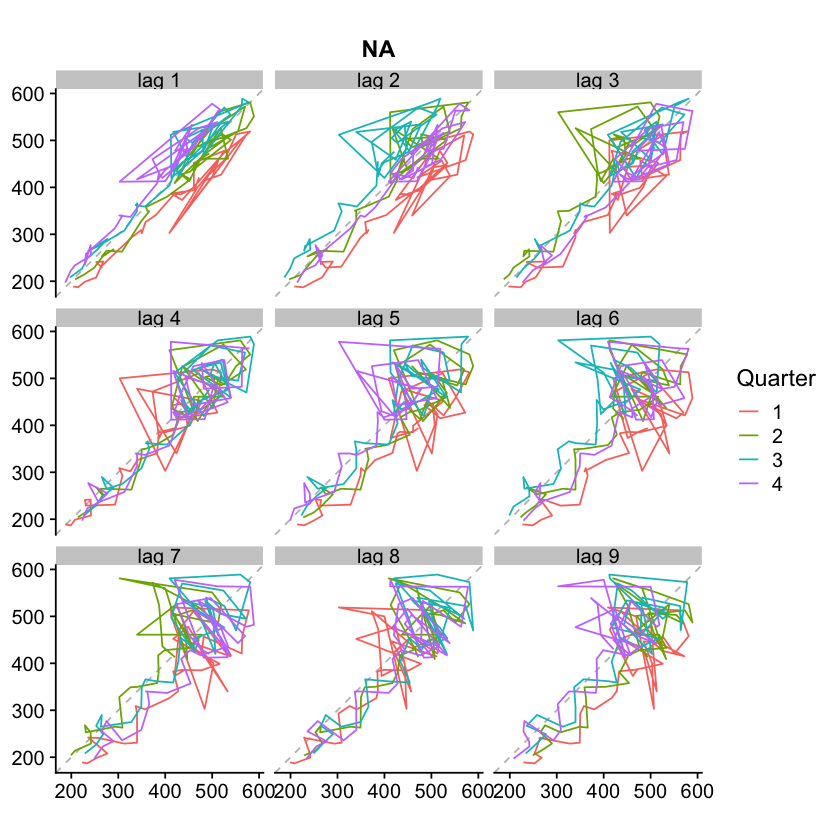

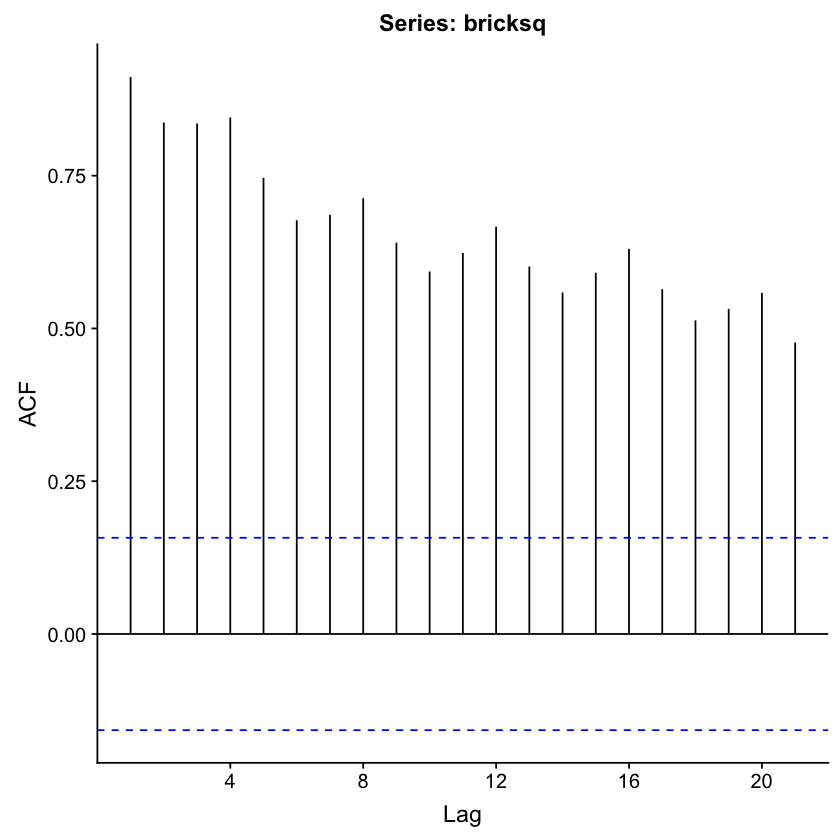

In [23]:
autoplot(bricksq)
ggseasonplot(bricksq)
ggsubseriesplot(bricksq)
gglagplot(bricksq)
ggAcf(bricksq)

Trend of growth overall; seasonality before 1975s every year; cyclical pattern similar to business cycles not in fixed time periods. 

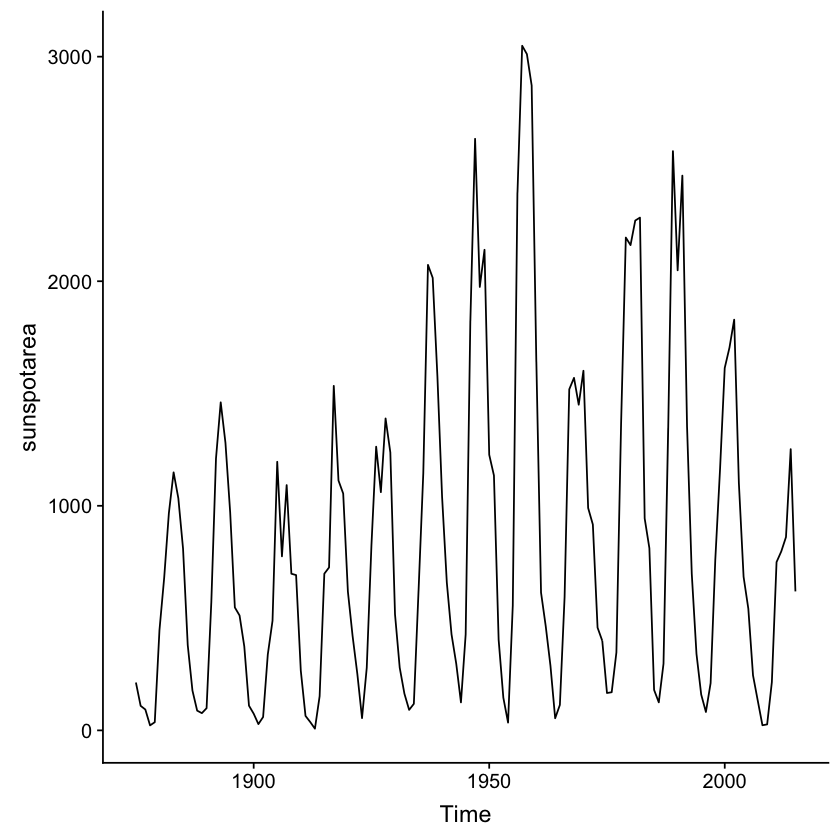

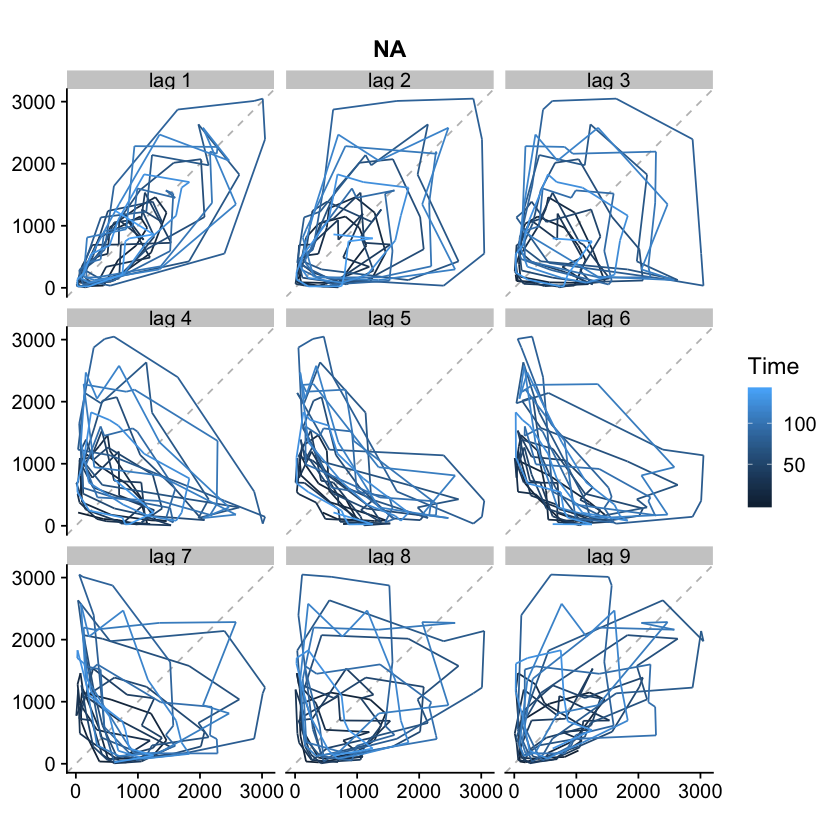

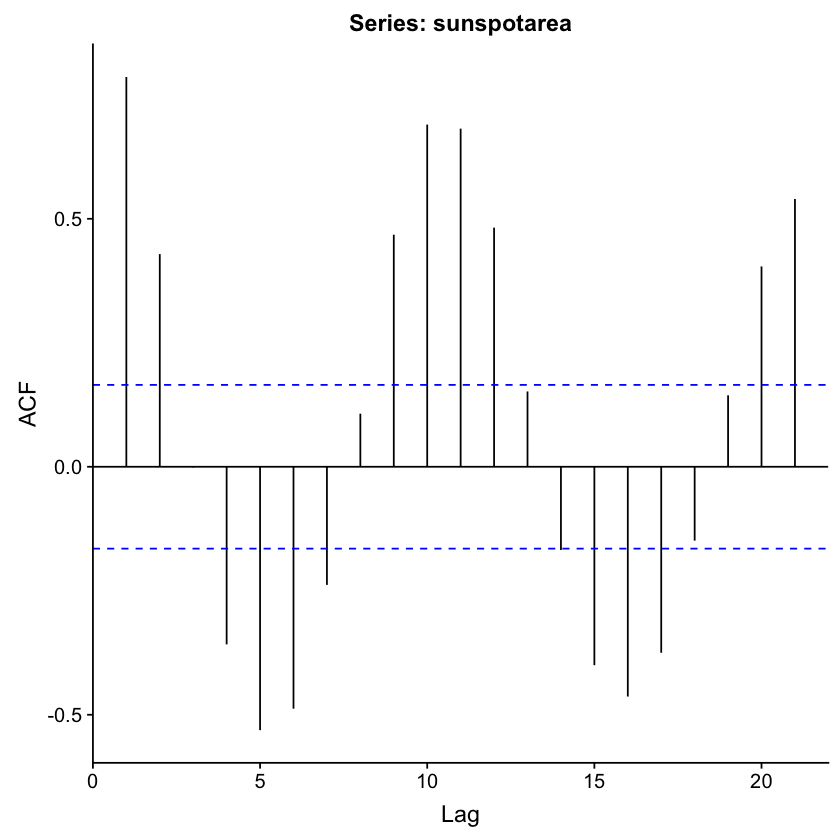

In [24]:
autoplot(sunspotarea)
#ggseasonplot(sunspotarea)
#ggsubseriesplot(sunspotarea)
gglagplot(sunspotarea)
ggAcf(sunspotarea)

There is no strong seasonality (very interesting that the system code tells me there isn't); however, there might be a cyclinal pattern with three periods. 

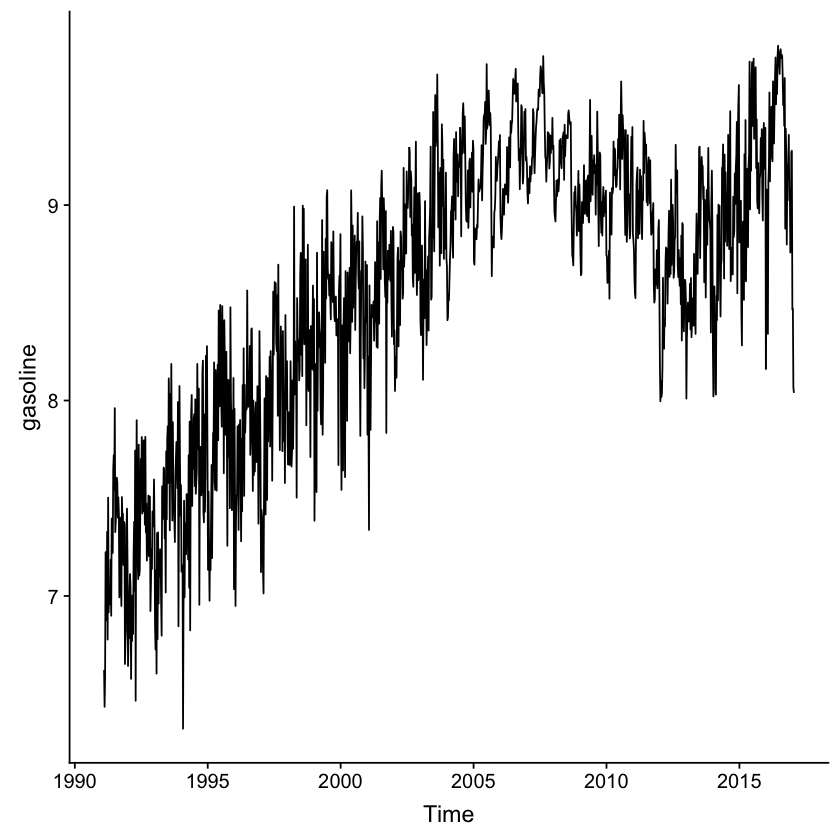

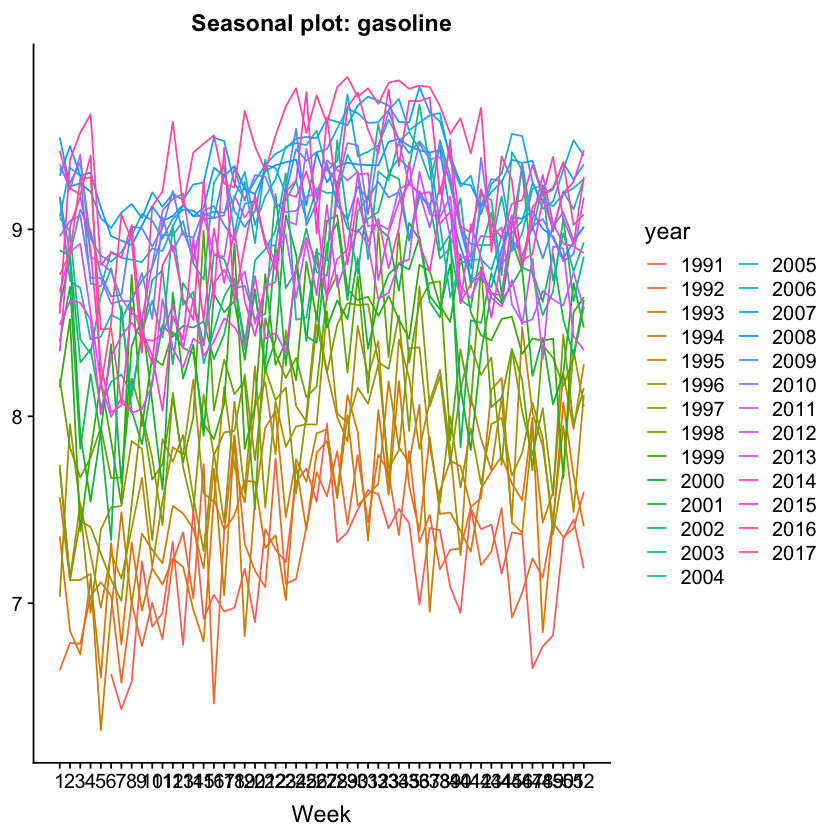

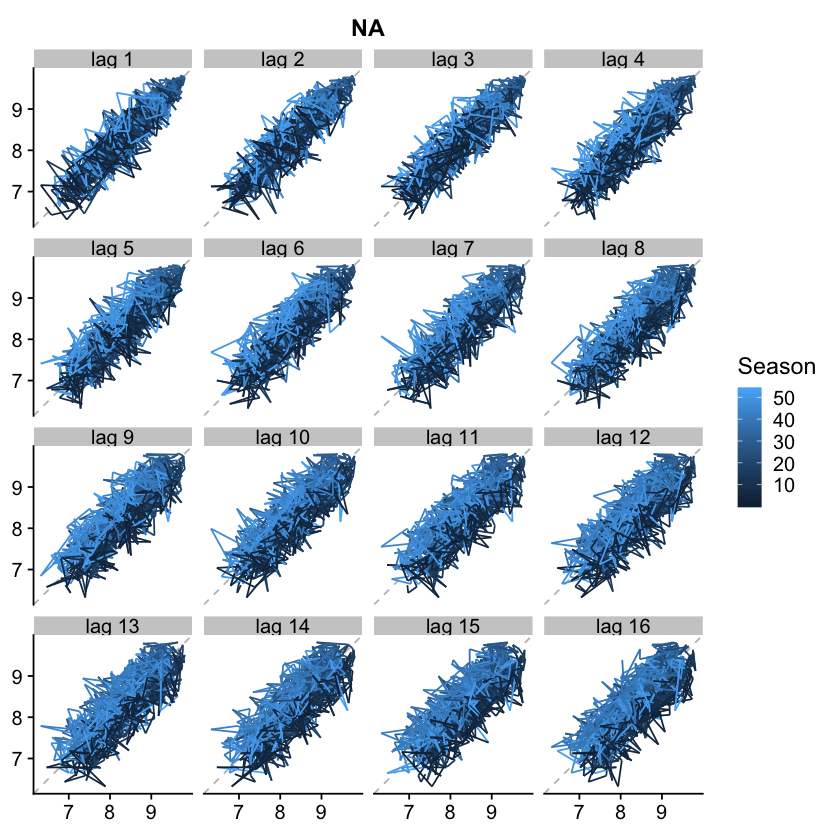

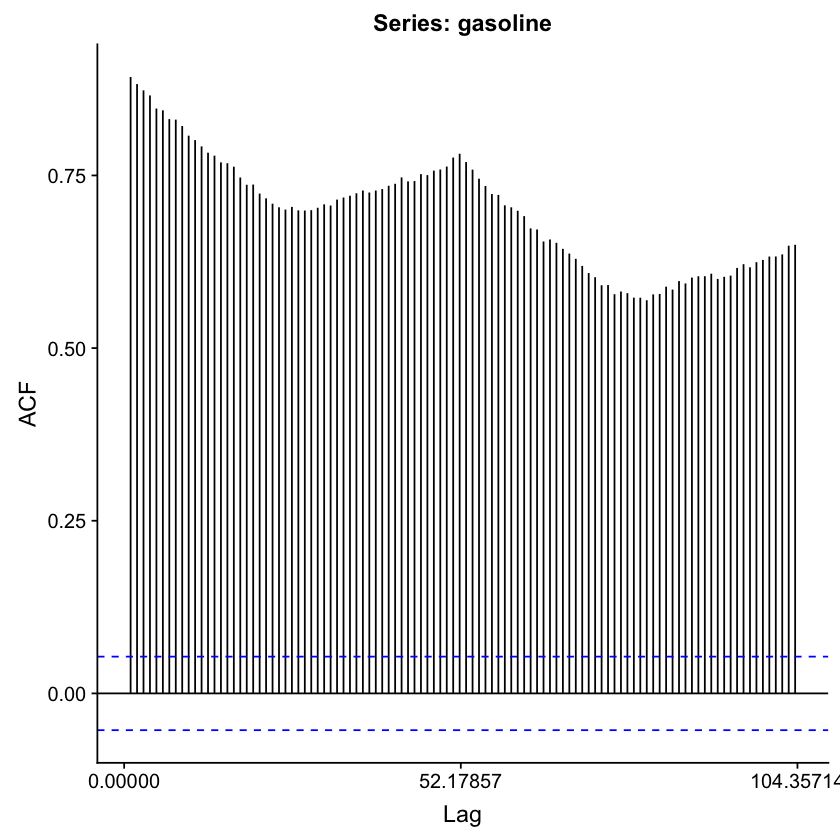

In [25]:
autoplot(gasoline)
ggseasonplot(gasoline)
#ggsubseriesplot(gasoline[,1])
gglagplot(gasoline)
ggAcf(gasoline)

There is no show of seasonality or cyclicity but there is a growth trend from 1990 to 2005, and then the gasoline amounts flutate roughly around a level. 


### 2.10.7

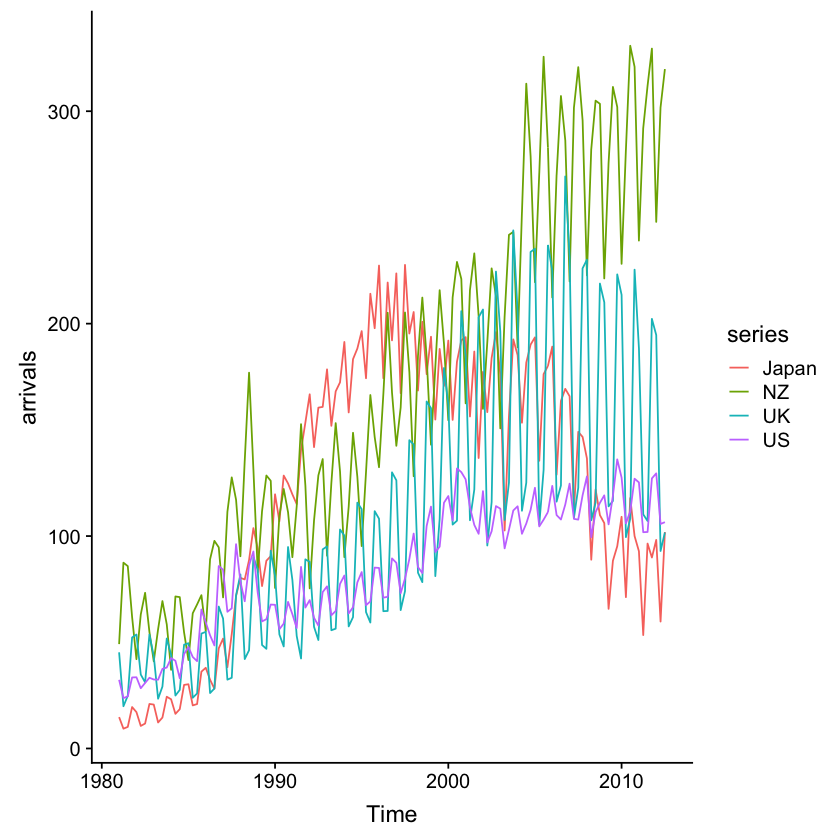

In [26]:
autoplot(arrivals)

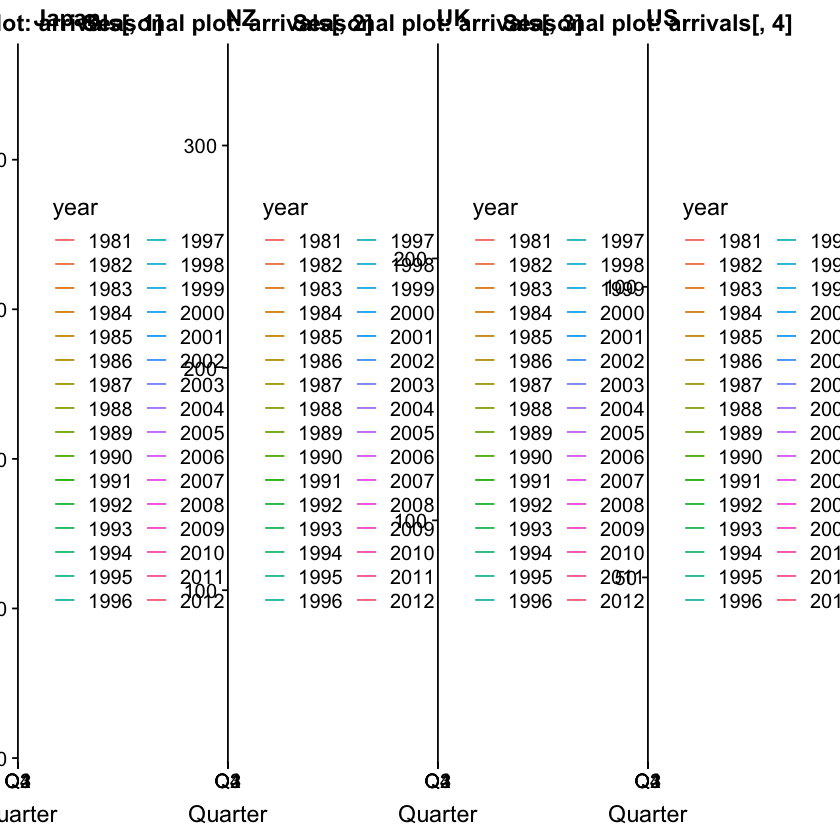

In [27]:
japan1 <- ggseasonplot(arrivals[,1])
nz1 <- ggseasonplot(arrivals[,2])
uk1 <- ggseasonplot(arrivals[,3])
us1 <- ggseasonplot(arrivals[,4])
plot_grid(japan1, nz1, uk1, us1 
          , labels = c("Japan", "NZ", "UK", "US")
          , nrow = 1) 

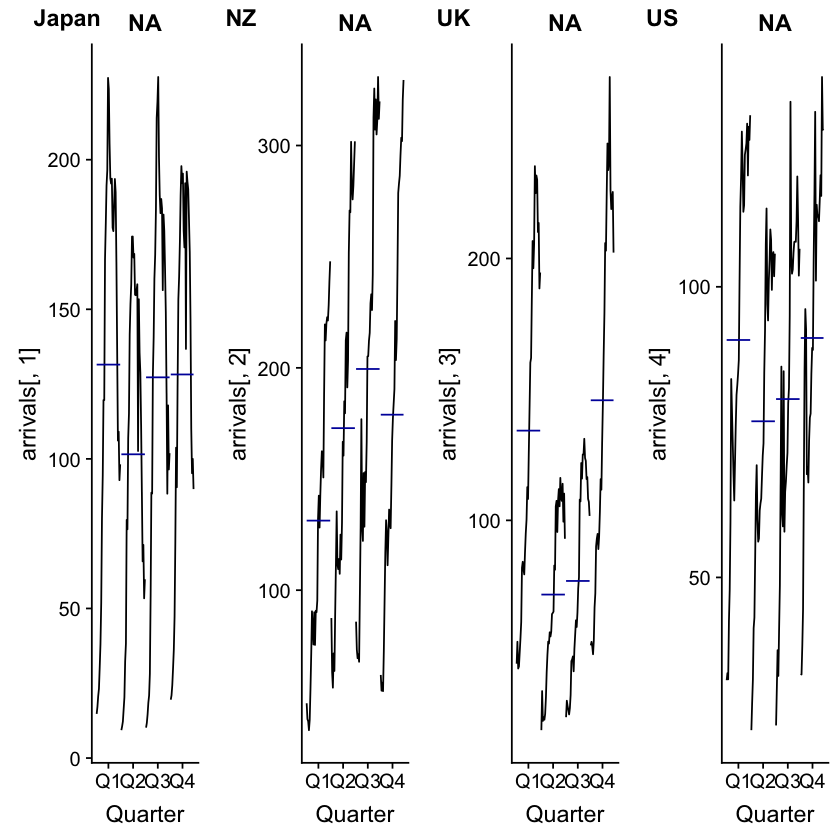

In [28]:
japan2 <- ggsubseriesplot(arrivals[,1])
nz2 <- ggsubseriesplot(arrivals[,2])
uk2 <- ggsubseriesplot(arrivals[,3])
us2 <- ggsubseriesplot(arrivals[,4])
plot_grid(japan2, nz2, uk2, us2
          , labels = c("Japan", "NZ", "UK", "US")
          , nrow = 1
          )